In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import csv
import datetime as dt
import json

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
steam_2016 = pd.read_csv('C:/Users/Barbie/Desktop/DA11/Capstone/STEAM/COOKED_STEAM_DATA/games_features_CLEANED.csv')

In [4]:
steam_2016 = steam_2016.drop(columns = ['QueryName'])
steam_2016 = steam_2016.rename(columns = {'ResponseName' : 'Name', 'PriceInitial': 'PriceInitial_2016',
                                         'PriceFinal' : 'PriceFinal_2016'})
steam_2016 = steam_2016.dropna(subset = ['Name'])

In [5]:
steam_2016.head(3)

,QueryID,ResponseID,Name,ReleaseDate,ReleaseYear,ReleaseMonth,RequiredAge,DLCCount,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,AchievementCount,ControllerSupport,IsFree,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryVRSupport,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceCurrency,PriceInitial_2016,PriceFinal_2016,AboutText,DetailedDescrip,SupportedLanguages
0,10.0,10.0,Counter-Strike,2000-11-01,2000,November,0,0,88,68991,13,13033334,9140731,0,False,False,False,True,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,9.99,9.99,Play the worlds number 1 online action game. E...,Play the worlds number 1 online action game. E...,English French German Italian Spanish Simplifi...
1,20.0,20.0,Team Fortress Classic,1999-04-01,1999,April,0,0,0,2439,5,5399140,753627,0,False,False,False,True,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,One of the most popular online action games of...,One of the most popular online action games of...,English French German Italian Spanish
2,30.0,30.0,Day of Defeat,2003-05-01,2003,May,0,0,79,2319,5,7621102,1709740,0,False,False,False,True,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,English French German Italian Spanish


In [6]:
# checking for duplicates

# steam_2016['Name'].value_counts()  

In [7]:
# gives us the unique years and count of releases each year

# steam_2016.value_counts('ReleaseYear').sort_values().reset_index()  

In [8]:
# gives us the unique months and count of releases each month

# steam_2016.value_counts('ReleaseMonth').reset_index() 

In [9]:
# gives us the unique required ages with how many games were associated

# steam_2016.value_counts('RequiredAge').reset_index() 

In [10]:
#gives us all games with Metacritic ratings

# steam_2016['Metacritic'].reset_index().sort_values('Metacritic', ascending = False) 

## Next I read in a dataset that I wanted to include in my Capstone project alongside my existing one.

## This dataset is composed of multiple Steam API calls. I used a website called SteamSpy who runs data and stats on Steam's platform, updating every 24 hours. I wanted the freshed data from Steam, including all of their games and game info. The API call to retrieve this information would return roughly 1,000 games at once. So in order to obtain ALL of the games on Steam, I did 73 seperated Steam calls to retrieve the data I wanted. I then conslidated them into one giant json file using Notepad ++.

## That file is what I read into Python, as you can see my code below. I have commented it out while I work on my analysis so it doesn't have to read in the json file every time I need to restart my kernel.

In [11]:
# writting in the giant json file
# all_steam_data_MERGED = pd.read_json(r"C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_CALLS_STEAM\COMBINED_TESTING_2.json")

# using this to turn the columns into rows and the rows into columns
# all_steam_data = all_steam_data_MERGED.transpose()       

# renaming all the columns to make it flow better
# all_steam_data = all_steam_data.rename(
#     columns = {'appid' : 'App_Id',
#                'name' : 'Name',
#                'developer' : 'Developer',
#                'publisher' : 'Publisher',
#                'score_rank' : 'Score_Rank',
#                'positive' : 'Postive_Reviews',b
#                'negative' : 'Negative_Reviews',
#                'userscore' : 'Userscore',
#                'owners' : 'Owners',
#                'average_forever' : 'Avg_Playtime_Lifetime',
#                'average_2weeks' : 'Avg_Playtime_Two_Weeks',
#                'median_forever' : 'Median_Playtime_Lifetime',
#                'median_2weeks' : 'Median_Playtime_Two_Weeks',
#                'price' : 'Current_Price',
#                'initialprice' : 'Initial_Price',
#                'discount' : 'Discount',
#                'ccu' : 'Peak_CCU'})

# resetting the index since it seemed to have its own index column identical to the "App_id" column
# all_steam_data = all_steam_data.reset_index()     

# dropped the other index column to have the tradiation index column to run alongside the "App_id" column
# all_steam_data = all_steam_data.drop(columns = ['index'])

## The code below was used to create a csv file with this new data. I have commented this out so it doesn't write a new csv file everytime.

In [12]:
# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\COOKED_STEAM_DATA\all_steam_data.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# all_steam_data.to_csv(filepath)  

# imported it out as a csv to load into Excel
# commented it out so it doesn't create a new csv every time I run the notebook :)

## From now on, I will read in the csv file I created above as the basis for my analysis!

In [13]:
# steam_api = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Project_Data\Capstone\all_steam_data_analysis.csv')

In [14]:
steam_api_filtered = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\steam_api_filtered.csv')

In [15]:
# i = steam_api[((steam_api.Name == 'RETNE'))].index 
# steam_api_filtered = steam_api.drop(i)
# steam_api_filtered

In [16]:
#dropping duplicate game names and 2 irrevelant columns to clean it up a bit more
# steam_api_filtered = steam_api.drop_duplicates(subset = ['Name'], keep = 'last')
# steam_api_filtered = steam_api_filtered.drop(columns = ['Unnamed: 0', 'Current_Price', 'Initial_Price', 'Score_Rank', 'Userscore'])
# steam_api_filtered = steam_api_filtered.rename(columns = {'Current_Price_Fixed' : 'Current_Price_$', 
#                                         'Initial_Priced_Fixed' : 'Initial_Price_$',
#                                         'Discount' : 'Discount_in_%'})


# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Project_Data\Capstone\steam_api_filtered.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# steam_api_filtered.to_csv(filepath)  

In [17]:
# steam_api_filtered.dtypes

## Next I will merge the inital 2016 dataset to my Steam Api dataset.

In [18]:
# steam_merged = steam_2016.merge(steam_API, on = 'Name', how = 'outer')

In [19]:
# steam_merged

In [20]:
# the_steam_data = steam_merged.drop(columns = ['QueryID', 'ResponseID', 'AboutText', 'DetailedDescrip', 
#                                              'App_Id', 'Score_Rank'])

# the_steam_data = the_steam_data.rename(columns = {'Current_Price' : 'Current_Price_2024',
#                                                   'Initial_Price' : 'Initial_Price_2024'})

# the_steam_data.head(3)

##  

# Now... to being my analysis!

##  

In [21]:
steam_api_filtered = steam_api_filtered.drop(columns = ['Unnamed: 0'])
steam_api_filtered = steam_api_filtered.drop(columns = ['Avg_Playtime_Lifetime'])
steam_api_filtered = steam_api_filtered.drop(columns = ['Median_Playtime_Lifetime'])

In [22]:
steam_api_filtered

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",353,445,39.99,39.99,0.0,7073
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",742,238,29.99,29.99,0.0,22622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,1963990,Deliver Us From Evil (DUFE) - Masquerade,Galen Games,Galen Games,4,2,"0 .. 20,000",0,0,4.99,4.99,0.0,0
70326,1726330,Game Developer Simulator,Phantom Studio,Phantom Studio,3,7,"0 .. 20,000",0,0,3.99,3.99,0.0,0
70327,740310,Transmogrify,Odyssey Entertainment,Odyssey Entertainment,21,2,"0 .. 20,000",0,0,14.99,14.99,0.0,0
70328,1285350,Easy puzzle: Landscape,Laush Dmitriy Sergeevich,Laush Studio,12,2,"0 .. 20,000",0,0,3.99,3.99,0.0,0


In [23]:
# steam_api_filtered['Avg_Playtime_Lifetime'].sum()

## Total average playtime since March 2009 on steam is 16,402,282 minutes! 
## That's 273,371 hours, 11,390 days, about 380 months, and 31.6 YEARS!

In [24]:
# top 10 Developers (create the game itself with programming, art and design)
steam_api_filtered.value_counts('Developer').head(10).reset_index()

,Developer,count
0,Choice of Games,158
1,Creobit,135
2,Laush Dmitriy Sergeevich,116
3,"KOEI TECMO GAMES CO., LTD.",100
4,Hosted Games,99
5,Sokpop Collective,99
6,Boogygames Studios,98
7,Elephant Games,79
8,Dnovel,70
9,Blender Games,69


In [25]:
# top 10 Publishers (responsible for marketing, distributing, financing, etc)
steam_api_filtered.value_counts('Publisher').head(10).reset_index()

,Publisher,count
0,Big Fish Games,489
1,8floor,259
2,Conglomerate 5,199
3,SEGA,187
4,HH-Games,183
5,Choice of Games,158
6,Strategy First,157
7,Sekai Project,151
8,Ubisoft,140
9,THQ Nordic,134


In [26]:
total_owners = steam_api_filtered.value_counts('Owners').reset_index()
total_owners

,Owners,count
0,"0 .. 20,000",48137
1,"20,000 .. 50,000",9417
2,"50,000 .. 100,000",4705
3,"100,000 .. 200,000",3105
4,"200,000 .. 500,000",2597
5,"500,000 .. 1,000,000",1117
6,"1,000,000 .. 2,000,000",655
7,"2,000,000 .. 5,000,000",391
8,"5,000,000 .. 10,000,000",125
9,"10,000,000 .. 20,000,000",45


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '0 .. 20,000'),
  Text(1, 0, '20,000 .. 50,000'),
  Text(2, 0, '50,000 .. 100,000'),
  Text(3, 0, '100,000 .. 200,000'),
  Text(4, 0, '200,000 .. 500,000'),
  Text(5, 0, '500,000 .. 1,000,000'),
  Text(6, 0, '1,000,000 .. 2,000,000'),
  Text(7, 0, '2,000,000 .. 5,000,000'),
  Text(8, 0, '5,000,000 .. 10,000,000'),
  Text(9, 0, '10,000,000 .. 20,000,000'),
  Text(10, 0, '20,000,000 .. 50,000,000'),
  Text(11, 0, '50,000,000 .. 100,000,000'),
  Text(12, 0, '100,000,000 .. 200,000,000')])

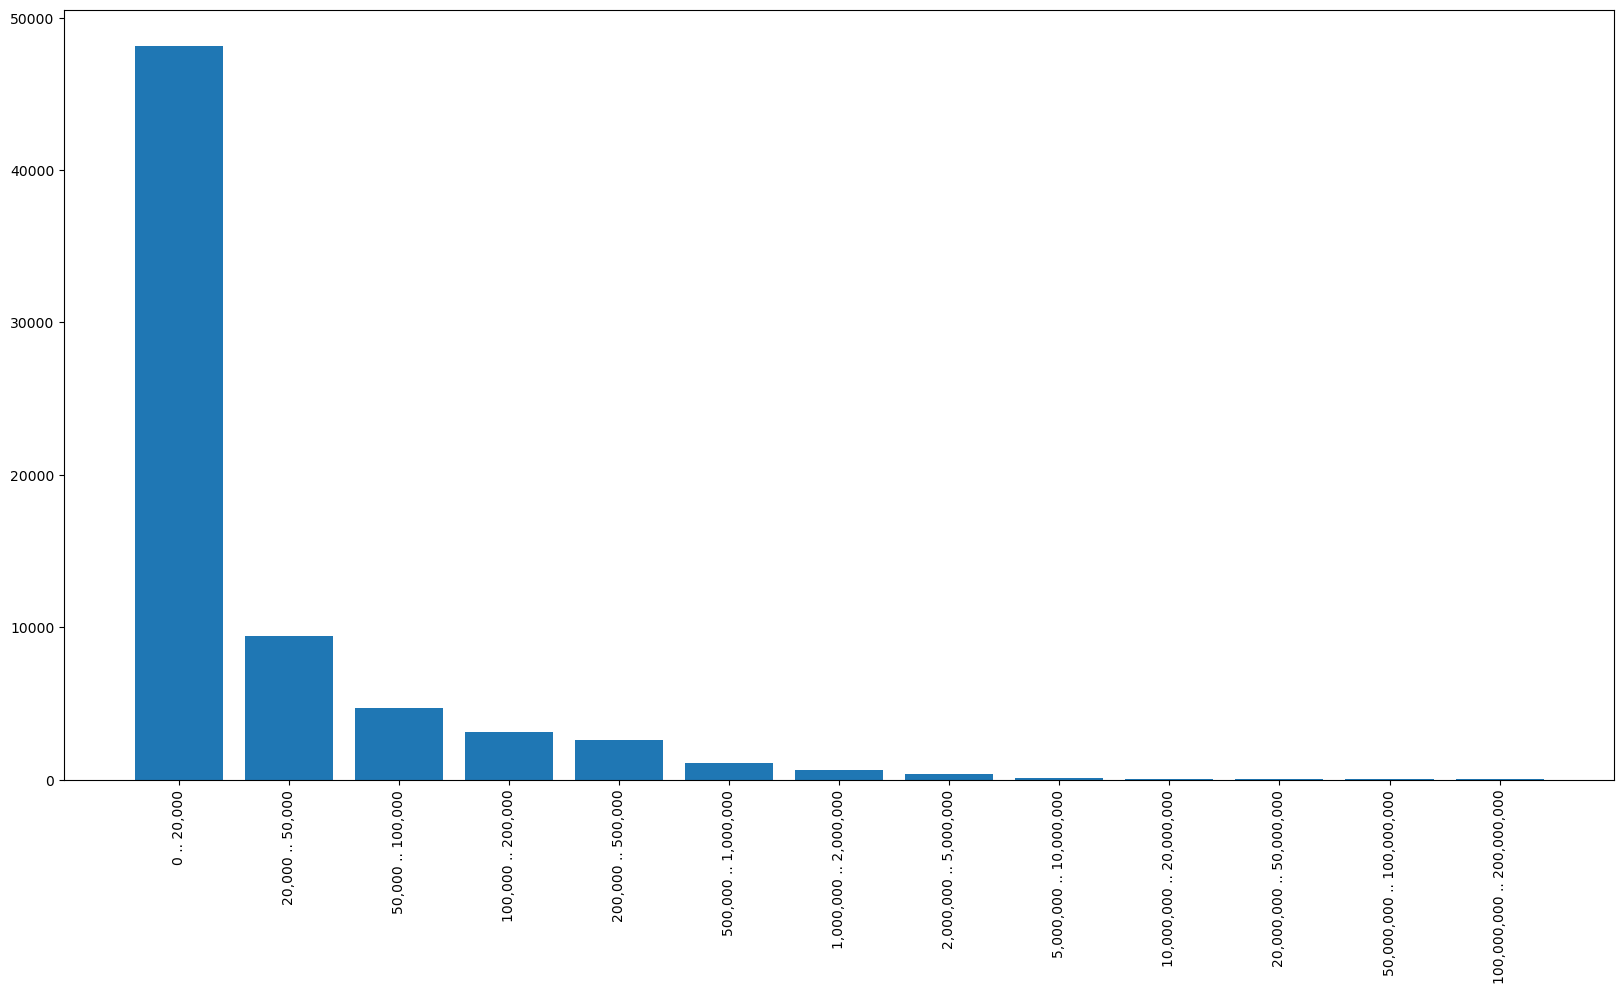

In [27]:
plt.figure(figsize = (20, 10))
plt.bar(total_owners['Owners'], total_owners['count'])
plt.xticks(rotation = 90)

In [204]:
owners1 = steam_api_filtered[steam_api_filtered['Owners'] == '0 .. 20,000'].sort_values('Positive_Reviews', ascending = False)
owners2 = steam_api_filtered[steam_api_filtered['Owners'] == '20,000 .. 50,000'].sort_values('Positive_Reviews', ascending = False)
owners3 = steam_api_filtered[steam_api_filtered['Owners'] == '50,000 .. 100,000'].sort_values('Positive_Reviews', ascending = False)
owners4 = steam_api_filtered[steam_api_filtered['Owners'] == '100,000 .. 200,000'].sort_values('Positive_Reviews', ascending = False)
owners5 = steam_api_filtered[steam_api_filtered['Owners'] == '200,000 .. 500,000'].sort_values('Positive_Reviews', ascending = False)
owners6 = steam_api_filtered[steam_api_filtered['Owners'] == '500,000 .. 1,000,000'].sort_values('Positive_Reviews', ascending = False)
owners7 = steam_api_filtered[steam_api_filtered['Owners'] == '1,000,000 .. 2,000,000'].sort_values('Positive_Reviews', ascending = False)
owners8 = steam_api_filtered[steam_api_filtered['Owners'] == '2,000,000 .. 5,000,000'].sort_values('Positive_Reviews', ascending = False)
owners9 = steam_api_filtered[steam_api_filtered['Owners'] == '5,000,000 .. 10,000,000'].sort_values('Positive_Reviews', ascending = False)
owners10 = steam_api_filtered[steam_api_filtered['Owners'] == '10,000,000 .. 20,000,000'].sort_values('Positive_Reviews', ascending = False)
owners11 = steam_api_filtered[steam_api_filtered['Owners'] == '20,000,000 .. 50,000,000'].sort_values('Positive_Reviews', ascending = False)
owners12 = steam_api_filtered[steam_api_filtered['Owners'] == '50,000,000 .. 100,000,000'].sort_values('Positive_Reviews', ascending = False)
owners13 = steam_api_filtered[steam_api_filtered['Owners'] == '100,000,000 .. 200,000,000'].sort_values('Positive_Reviews', ascending = False)

In [ ]:
owners1['diff_in_pos_neg_reviews']

In [246]:
def positive_reviews_per_owner_bucket(Owners):
    owners = steam_api_filtered[steam_api_filtered['Owners'] == Owners]
    return owners['diff_in_pos_neg_reviews'].sum()

   
    
#     if Owners == '20,000 .. 50,000':
#         return steam_api_filtered['diff_in_pos_neg_reviews'].sum()
                                  
#     return steam_api_filtered[steam_api_filtered['Owners'] == Owners].sort_values('Positive_Reviews', ascending = False)

In [247]:
positive_reviews_per_owner_bucket('0 .. 20,000')

1093940

In [248]:
positive_reviews_per_owner_bucket('20,000 .. 50,000')

1094607

In [249]:
positive_reviews_per_owner_bucket('50,000 .. 100,000')

1465004

In [250]:
positive_reviews_per_owner_bucket('2,000,000 .. 5,000,000')

16532128

In [252]:
# what code could I create to run all specified owner buckets automatically vs having to manually enter them into the function?
# im thinking maybe a for loop?? or maybe list with all the unique owners?

In [202]:
owners_2_mil_5_mil = steam_api_filtered[steam_api_filtered['Owners'] == '2,000,000 .. 5,000,000'].sort_values('Positive_Reviews', ascending = False)
owners_2_mil_5_mil

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
243,960090,Bloons TD 6,Ninja Kiwi,Ninja Kiwi,300474,8157,"2,000,000 .. 5,000,000",150,46,13.99,13.99,0.0,14289,0.0,True,292317
217,548430,Deep Rock Galactic,Ghost Ship Games,Coffee Stain Publishing,280872,8250,"2,000,000 .. 5,000,000",429,144,29.99,29.99,0.0,10906,0.0,False,272622
430,391540,Undertale,tobyfox,tobyfox,218087,7556,"2,000,000 .. 5,000,000",56,80,9.99,9.99,0.0,1165,0.0,True,210531
241,1293830,Forza Horizon 4,Playground Games,Xbox Game Studios,195188,22597,"2,000,000 .. 5,000,000",162,227,59.99,59.99,0.0,5595,0.0,False,172591
211,1551360,Forza Horizon 5,Playground Games,Xbox Game Studios,156570,21055,"2,000,000 .. 5,000,000",266,106,59.99,59.99,0.0,16576,0.0,False,135515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,33900,Arma 2,Bohemia Interactive,Bohemia Interactive,1776,352,"2,000,000 .. 5,000,000",0,0,12.99,12.99,0.0,2,0.0,True,1424
513,265590,The Red Solstice,Ironward,Ironward,1745,694,"2,000,000 .. 5,000,000",0,0,9.99,9.99,0.0,2,0.0,True,1051
477,437900,Party Jousting,vikingfabian.com,vikingfabian.com,661,61,"2,000,000 .. 5,000,000",0,0,0.00,0.00,0.0,0,0.0,True,600
421,279720,The I of the Dragon,Primal,TopWare Interactive,637,300,"2,000,000 .. 5,000,000",0,0,7.99,7.99,0.0,4,0.0,False,337


In [189]:
owners_2_mil_5_mil['Positive_Reviews'].sum()

19289284

In [ ]:
steam_api_filtered[steam_api_filtered['Owners'] == '2,000,000 .. 5,000,000'].sort_values('Positive_Reviews', ascending = False)
owners_2_mil_5_mil

In [193]:
owners_2_mil_5_mil['diff_in_pos_neg_reviews'].sum()

16532128

In [196]:
owners_20_50 = steam_api_filtered[steam_api_filtered['Owners'] == '20,000 .. 50,000'].sort_values('Positive_Reviews', ascending = False)
owners_20_50

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
13657,1049100,æ³¡æ²«å†¬æ™¯,Nekoday,"Nekoday, mirai works, MangaGamer",4057,189,"20,000 .. 50,000",0,0,7.49,14.99,50.0,5,7.5,False,3868
12985,1586800,Lil Gator Game,MegaWobble,Playtonic Friends,3926,38,"20,000 .. 50,000",0,0,9.99,19.99,50.0,36,10.0,False,3888
16013,1567800,æ˜Ÿç©ºåˆ—è½¦ä¸Žç™½çš„æ—…è¡Œ,ã—ã‚‰ãŸã¾ã“,"inc.ZOFE, Syawase Works China",3671,32,"20,000 .. 50,000",0,0,19.99,19.99,0.0,24,0.0,False,3639
14981,743390,DISTRAINT 2,Jesse Makkonen,Jesse Makkonen,3530,155,"20,000 .. 50,000",0,0,8.99,8.99,0.0,1,0.0,True,3375
12826,1069230,æœˆå½±é­…åƒ-è§£æ”¾ä¹‹ç¾½-,Applique,HIKARI FIELD,3055,70,"20,000 .. 50,000",0,0,5.59,15.99,65.0,17,10.4,False,2985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21836,1025450,Forever Lost: Episode 3,Glitch Games Ltd,Glitch Games Ltd,0,1,"20,000 .. 50,000",0,0,0.00,0.00,0.0,0,0.0,True,-1
15360,2107330,Crisp's Charging Challenge,Lads Game Studio,Lads Game Studio,0,1,"20,000 .. 50,000",0,0,4.99,4.99,0.0,0,0.0,True,-1
16418,787580,10 Pin Bowling (VR Support),CBGameDev,CBGameDev,0,1,"20,000 .. 50,000",0,0,10.99,10.99,0.0,0,0.0,True,-1
19392,993530,Codename Nemesis,Broken Helm Studio,Broken Helm Studio,0,1,"20,000 .. 50,000",0,0,1.99,1.99,0.0,0,0.0,True,-1


In [197]:
owners_20_50['diff_in_pos_neg_reviews'].sum()

1094607

In [200]:
owners_20_50[owners_20_50['diff_in_pos_neg_reviews'] < 0].sort_values('diff_in_pos_neg_reviews', ascending = True)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
18959,792990,Identity,Asylum Entertainment Inc.,Asylum Entertainment Inc.,352,1770,"20,000 .. 50,000",0,0,29.99,29.99,0.0,0,0.0,True,-1418
16836,1439300,NASCAR 21: Ignition,Motorsport Games,Motorsport Games,201,639,"20,000 .. 50,000",0,0,17.99,17.99,0.0,11,0.0,True,-438
13589,743860,Wild West Online,WWO Partners Ltd,WWO Partners Ltd,267,670,"20,000 .. 50,000",0,0,0.00,0.00,0.0,0,0.0,True,-403
16557,714370,LEFT ALIVE,Square Enix,Square Enix,241,577,"20,000 .. 50,000",0,0,59.99,59.99,0.0,1,0.0,True,-336
15437,719590,Mesozoica,"Underdog Interactive, Squadron Interactive, Dr...",Underdog Interactive,129,452,"20,000 .. 50,000",0,0,0.99,0.99,0.0,0,0.0,False,-323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18419,463670,Runeyana,Blackturn Ltd,Blackturn Ltd,24,25,"20,000 .. 50,000",0,0,0.00,0.00,0.0,0,0.0,True,-1
20105,1069090,PureDesktop,PurePortal,PurePortal,23,24,"20,000 .. 50,000",0,0,0.00,0.00,0.0,0,0.0,True,-1
19173,949830,Shrines Of Sacred EssenÑe,Daniil Titner,Daniil Titner,1,2,"20,000 .. 50,000",0,0,0.99,0.99,0.0,0,0.0,True,-1
19993,763520,Hard Place,Red twice potato,Red twice potato,26,27,"20,000 .. 50,000",0,0,3.99,3.99,0.0,0,0.0,True,-1


In [201]:
owners_2_mil_5_mil[owners_2_mil_5_mil['diff_in_pos_neg_reviews'] < 0].sort_values('diff_in_pos_neg_reviews', ascending = True)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
290,1832640,Mirror 2: Project X,KAGAMI â…¡ WORKs,NIJICO,29386,88362,"2,000,000 .. 5,000,000",49,49,1.99,1.99,0.0,21,0.0,False,-58976
385,1372880,The Day Before,FNTASTIC,Mytona Fntastic,3737,19937,"2,000,000 .. 5,000,000",0,0,0.00,0.00,0.0,0,0.0,False,-16200
344,1272080,PAYDAY 3,Starbreeze Studios,Deep Silver,19479,30934,"2,000,000 .. 5,000,000",0,0,39.99,39.99,0.0,378,0.0,False,-11455
240,1225330,NBA 2K21,Visual Concepts,2K,16311,22928,"2,000,000 .. 5,000,000",0,0,0.00,0.00,0.0,340,0.0,False,-6617
450,841370,NBA 2K19,Visual Concepts,2K,8893,13876,"2,000,000 .. 5,000,000",27,27,0.00,0.00,0.0,245,0.0,False,-4983
214,766570,Russian Fishing 4,FishSoft LLC,FishSoft LLC,30489,32695,"2,000,000 .. 5,000,000",257,386,0.00,0.00,0.0,17248,0.0,True,-2206
262,1056960,Wolfenstein: Youngblood,"Machine Games, Arkane Studios",Bethesda Softworks,5897,7276,"2,000,000 .. 5,000,000",1,1,19.99,19.99,0.0,89,0.0,False,-1379
589,389430,Knight Online,"Noah System, Mgame",NTTGame,5276,5286,"2,000,000 .. 5,000,000",0,0,0.00,0.00,0.0,1265,0.0,False,-10
391,1619450,Heart of a Warrior,Techworld Communication,Techworld Communication,0,1,"2,000,000 .. 5,000,000",0,0,10.99,10.99,0.0,0,0.0,True,-1


In [28]:
# only 2 games on Steam that have over 100,000,000 owners

steam_api_filtered[steam_api_filtered['Owners'] == '100,000,000 .. 200,000,000']

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.0,0.0,0.0,851269
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.0,0.0,0.0,1242112


In [29]:
steam_api_filtered['diff_current_initial_price'] = steam_api_filtered['Initial_Price_$'] - steam_api_filtered['Current_Price_$']

In [30]:
steam_api_filtered

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",353,445,39.99,39.99,0.0,7073,0.0
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",742,238,29.99,29.99,0.0,22622,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,1963990,Deliver Us From Evil (DUFE) - Masquerade,Galen Games,Galen Games,4,2,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0
70326,1726330,Game Developer Simulator,Phantom Studio,Phantom Studio,3,7,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0
70327,740310,Transmogrify,Odyssey Entertainment,Odyssey Entertainment,21,2,"0 .. 20,000",0,0,14.99,14.99,0.0,0,0.0
70328,1285350,Easy puzzle: Landscape,Laush Dmitriy Sergeevich,Laush Studio,12,2,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0


In [31]:
# Looks like majority of games have stayed the same price from their initial release to today
steam_api_filtered.value_counts('diff_current_initial_price').reset_index()

,diff_current_initial_price,count
0,0.00,64514
1,0.50,483
2,9.00,176
3,3.50,160
4,4.00,151
...,...,...
498,6.24,1
499,6.48,1
500,6.57,1
501,6.60,1


In [32]:
total_games_no_change_in_price = len(steam_api_filtered[steam_api_filtered['diff_current_initial_price'] == 0.00])
total_games_no_change_in_price

64514

In [33]:
total_number_of_games = len(steam_api_filtered['Name'])
total_number_of_games

70330

In [34]:
perc_of_no_price_change = total_games_no_change_in_price / total_number_of_games * 100
perc_of_no_price_change

91.73041376368548

## 91.7% of games have not changed in intital price since their release.

In [35]:
steam_api_filtered.head(3)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.0,0.0,0.0,851269,0.0
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.0,0.0,0.0,1242112,0.0
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.0,0.0,0.0,396605,0.0


In [36]:
# Maybe which developers and publishers had the most postive reviews/negative reviews?

In [37]:
total_games = steam_api_filtered['Name'].nunique()
total_games

70329

In [38]:
total_developers = steam_api_filtered['Developer'].nunique()
total_developers

43975

In [39]:
total_publishers = steam_api_filtered['Publisher'].nunique()
total_publishers

38252

In [40]:
total_pos_reviews = steam_api_filtered['Positive_Reviews'].sum()
total_pos_reviews

107593120

In [41]:
total_neg_reviews = steam_api_filtered['Negative_Reviews'].sum()
total_neg_reviews

17852123

In [42]:
total_avgd_mins_2_wks = steam_api_filtered['Avg_Playtime_Two_Weeks'].sum()
total_avgd_mins_2_wks

670316

In [43]:
# total_everything = pd.concat([total_games, total_developers, total_publishers, 
#                               total_pos_reviews, total_neg_reviews, total_avgd_mins_2_wks])

In [44]:
steam_api_filtered['same_dev_pub'] = steam_api_filtered['Developer'] == steam_api_filtered['Publisher']
steam_api_filtered

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",353,445,39.99,39.99,0.0,7073,0.0,True
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",742,238,29.99,29.99,0.0,22622,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,1963990,Deliver Us From Evil (DUFE) - Masquerade,Galen Games,Galen Games,4,2,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True
70326,1726330,Game Developer Simulator,Phantom Studio,Phantom Studio,3,7,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True
70327,740310,Transmogrify,Odyssey Entertainment,Odyssey Entertainment,21,2,"0 .. 20,000",0,0,14.99,14.99,0.0,0,0.0,True
70328,1285350,Easy puzzle: Landscape,Laush Dmitriy Sergeevich,Laush Studio,12,2,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,False


In [45]:
total_true_dev_pub = len(steam_api_filtered[steam_api_filtered['same_dev_pub'] == True])
total_true_dev_pub

47474

In [46]:
total_false_dev_pub = len(steam_api_filtered[steam_api_filtered['same_dev_pub'] == False])
total_false_dev_pub

22856

In [47]:
perc_dev_pub_true = total_true_dev_pub / total_number_of_games * 100
perc_dev_pub_true

67.50177733541875

In [48]:
perc_dev_pub_false = total_false_dev_pub / total_number_of_games * 100
perc_dev_pub_false

32.49822266458126

## 67.5% of games are developed and published by the same company where as 32.5% have differing developers and publishers.

In [49]:
steam_api_filtered

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",353,445,39.99,39.99,0.0,7073,0.0,True
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",742,238,29.99,29.99,0.0,22622,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,1963990,Deliver Us From Evil (DUFE) - Masquerade,Galen Games,Galen Games,4,2,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True
70326,1726330,Game Developer Simulator,Phantom Studio,Phantom Studio,3,7,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True
70327,740310,Transmogrify,Odyssey Entertainment,Odyssey Entertainment,21,2,"0 .. 20,000",0,0,14.99,14.99,0.0,0,0.0,True
70328,1285350,Easy puzzle: Landscape,Laush Dmitriy Sergeevich,Laush Studio,12,2,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,False


In [50]:
# Choice of Games had the highest number of games as both Developer and Publisher
steam_api_filtered.value_counts(['Developer', 'Publisher']).reset_index()

,Developer,Publisher,count
0,Choice of Games,Choice of Games,158
1,Laush Dmitriy Sergeevich,Laush Studio,113
2,Creobit,8floor,109
3,Sokpop Collective,Sokpop Collective,99
4,Hosted Games,Hosted Games,99
...,...,...,...
46765,Blueace Studios,Blueace Studios,1
46766,Kyuubinx Prototype,Kyuubinx Prototype,1
46767,Kyvati Studios,Kyvati Studios,1
46768,Kyvos Studios,Kyvos Studios,1


In [51]:
# Choice of Games had the highest number of games as a Developer
steam_api_filtered.value_counts('Developer').reset_index()

,Developer,count
0,Choice of Games,158
1,Creobit,135
2,Laush Dmitriy Sergeevich,116
3,"KOEI TECMO GAMES CO., LTD.",100
4,Hosted Games,99
...,...,...
43970,Limitcore studio,1
43971,"LimitBreakersTM, Mario Meraz",1
43972,Liminal VR,1
43973,Liminal Logic,1


In [52]:
# Big Fish Games had the highest number of games as a Publisher
steam_api_filtered.value_counts('Publisher').reset_index()

,Publisher,count
0,Big Fish Games,489
1,8floor,259
2,Conglomerate 5,199
3,SEGA,187
4,HH-Games,183
...,...,...
38247,ITD Collective,1
38248,ITBT Studio,1
38249,IT-Fun Studios,1
38250,IT's Nuts,1


In [53]:
# filtered_positive_reviews = steam_api[steam_api['Positive_Reviews'] >= 100000].sort_values('Positive_Reviews', ascending = False).head(50)
# filtered_positive_reviews_merged = steam_2016.merge(filtered_positive_reviews, on = 'Name', how = 'outer')

In [54]:
# gives me the total number of games devleoped by each company, Valve having the highest at 5  -- focusing on TOP 3
# the only game they published but did NOT develop was Garry's Mod

# filtered_positive_reviews.value_counts('Developer').reset_index().head(3)

In [55]:
# gives me the total number of games published by each company, Valve having the highest at 6  -- focusing on TOP 3

# filtered_positive_reviews.value_counts('Publisher').reset_index().head(3)

In [56]:
# the 6 games with at least 100,000 pos reviews with Valve developing and/or publishing

# filtered_positive_reviews[filtered_positive_reviews['Publisher'] == 'Valve']

# 3 games out of the 6 have been always been free-to-play
# 2 out of the 6 are 9.99 and have always been that, unless discounted through the years
# 1 out of the 6 is 1.99 and always has been, unless discounted through the years

In [57]:
# next company with the highest number of games with at least 100,000 reviews; Bethesda Softworks being the publisher

# filtered_positive_reviews[filtered_positive_reviews['Developer'] == 'Bethesda Game Studios']

In [58]:
# top 10 games that had the most positive reviews
pos_reviews = steam_api_filtered.sort_values('Positive_Reviews', ascending = False)#.head(10)
pos_reviews

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True
8,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,1557234,236827,"50,000,000 .. 100,000,000",598,253,29.98,29.98,0.0,135799,0.0,False
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True
15,105600,Terraria,Re-Logic,Re-Logic,1257156,30601,"20,000,000 .. 50,000,000",1233,177,9.99,9.99,0.0,32126,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66386,2522300,Tactical Rampart,FOFF Studio,FOFF Studio,0,1,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True
43194,870940,Brainstorm Party,Golden Laugh Studio,Golden Laugh Studio,0,1,"0 .. 20,000",0,0,1.99,1.99,0.0,0,0.0,True
15079,1055870,Siberian Run VR,"Unsin Studio, EJRGames",Unsin Studio,0,2,"20,000 .. 50,000",0,0,15.99,19.99,20.0,0,4.0,False
43193,983040,Koboomballs,Yargybot,Yargybot,0,1,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True


In [59]:
filtered_pos_reviews = steam_2016.merge(pos_reviews, on = 'Name', how = 'outer')
filtered_pos_reviews = filtered_pos_reviews[filtered_pos_reviews['Positive_Reviews'] >= 500000]
filtered_pos_reviews = filtered_pos_reviews.sort_values('Positive_Reviews', ascending = False)
filtered_pos_reviews = filtered_pos_reviews.replace(np.nan, '-------') # game came AFTER steam_2016 data
filtered_pos_reviews = filtered_pos_reviews.drop(columns = ['QueryID', 'ResponseID', 'AboutText', 'DetailedDescrip'])


filtered_pos_reviews   

# these are all the games with at least 500,000 positive reviews
# if data is missing, then it's from the API data - came AFTER the 2016 dataset


,Name,ReleaseDate,ReleaseYear,ReleaseMonth,RequiredAge,DLCCount,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,AchievementCount,ControllerSupport,IsFree,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryVRSupport,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceCurrency,PriceInitial_2016,PriceFinal_2016,SupportedLanguages,App_Id,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub
25,Counter-Strike: Global Offensive,2010-07-19,2010,July,0.0,0.0,77.0,14625.0,10.0,4819841.0,4819841.0,66.0,False,True,False,True,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,,0.0,0.0,English,730.0,Valve,Valve,7034475.0,1032480.0,"100,000,000 .. 200,000,000",593.0,286.0,0.00,0.00,0.0,1242112.0,0.0,True
22,Dota 2,2009-11-16,2009,November,0.0,0.0,89.0,140726.0,17.0,15574539.0,13583400.0,70.0,True,False,False,True,True,True,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,19.99,19.99,Danish Dutch English* Finnish French* German* ...,570.0,Valve,Valve,1836663.0,408414.0,"100,000,000 .. 200,000,000",2477.0,2060.0,0.00,0.00,0.0,851269.0,0.0,True
2953,Grand Theft Auto V,2014-03-13,2014,March,0.0,2.0,0.0,346.0,13.0,39098.0,26364.0,236.0,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,USD,9.99,9.99,English**languages with full audio support,271590.0,Rockstar North,Rockstar Games,1557234.0,236827.0,"50,000,000 .. 100,000,000",598.0,253.0,29.98,29.98,0.0,135799.0,0.0,False
13194,PUBG: BATTLEGROUNDS,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,578080.0,"KRAFTON, Inc.","KRAFTON, Inc.",1380986.0,981812.0,"50,000,000 .. 100,000,000",1028.0,751.0,0.00,0.00,0.0,396605.0,0.0,True
1354,Terraria,2012-03-14,2012,March,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,English,105600.0,Re-Logic,Re-Logic,1257156.0,30601.0,"20,000,000 .. 50,000,000",1233.0,177.0,9.99,9.99,0.0,32126.0,0.0,True
13195,Tom Clancy's Rainbow Six Siege,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,359550.0,Ubisoft Montreal,Ubisoft,1096417.0,190821.0,"20,000,000 .. 50,000,000",691.0,289.0,7.99,19.99,60.0,71136.0,12.0,False
13196,Garry's Mod,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,4000.0,Facepunch Studios,Valve,1034030.0,34908.0,"20,000,000 .. 50,000,000",542.0,59.0,9.99,9.99,0.0,31395.0,0.0,False
19,Team Fortress 2,2007-10-10,2007,October,0.0,1.0,90.0,6104.0,5.0,5735062.0,2240435.0,22.0,False,False,False,True,True,True,True,False,False,False,False,False,Fals

## There are 27 games within our data that have over 500,000 positive reviews.

## 13 of which released AFTER our 2016 data.

In [60]:
filtered_pos_reviews.value_counts('Developer').reset_index()

,Developer,count
0,Valve,4
1,CD PROJEKT RED,2
2,Arrowhead Game Studios,1
3,OVERKILL - a Starbreeze Studio.,1
4,Ubisoft Montreal,1
5,"Studio Wildcard, Instinct Games, Efecto Studio...",1
6,SCS Software,1
7,Rockstar North,1
8,Rockstar Games,1
9,Respawn,1


In [61]:
filtered_pos_reviews.value_counts('Publisher').reset_index()

,Publisher,count
0,Valve,5
1,Rockstar Games,2
2,CD PROJEKT RED,2
3,Behaviour Interactive Inc.,1
4,PlayStation PC LLC,1
5,Ubisoft,1
6,"Studio Wildcard, Snail Games USA",1
7,Starbreeze Publishing AB,1
8,SCS Software,1
9,Re-Logic,1


In [62]:
filtered_pos_reviews.value_counts(['Developer', 'Publisher']).reset_index()

,Developer,Publisher,count
0,Valve,Valve,4
1,CD PROJEKT RED,CD PROJEKT RED,2
2,Arrowhead Game Studios,PlayStation PC LLC,1
3,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,1
4,Ubisoft Montreal,Ubisoft,1
5,"Studio Wildcard, Instinct Games, Efecto Studio...","Studio Wildcard, Snail Games USA",1
6,SCS Software,SCS Software,1
7,Rockstar North,Rockstar Games,1
8,Rockstar Games,Rockstar Games,1
9,Respawn,Electronic Arts,1


In [63]:
# top 10 games with the most negative reviews
steam_api_filtered.sort_values('Negative_Reviews', ascending = False).head(10)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True
7,1938090,Call of Duty: Modern Warfare II,"Sledgehammer Games, Treyarch, Infinity Ward, B...",Activision,333373,240280,"50,000,000 .. 100,000,000",343,80,69.99,69.99,0.0,81889,0.0,False
8,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,1557234,236827,"50,000,000 .. 100,000,000",598,253,29.98,29.98,0.0,135799,0.0,False
12,553850,HELLDIVERS 2,Arrowhead Game Studios,PlayStation PC LLC,630155,235602,"20,000,000 .. 50,000,000",579,444,39.99,39.99,0.0,58838,0.0,False
14,236390,War Thunder,Gaijin Entertainment,Gaijin Network Ltd,394984,234618,"20,000,000 .. 50,000,000",780,435,0.00,0.00,0.0,73903,0.0,False
18,359550,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,1096417,190821,"20,000,000 .. 50,000,000",691,289,7.99,19.99,60.0,71136,12.0,False
5,1172470,Apex Legends,Respawn,Electronic Arts,645151,183785,"50,000,000 .. 100,000,000",1042,376,0.00,0.00,0.0,219745,0.0,False
55,1517290,Battlefield 2042,DICE,Electronic Arts,115267,147629,"10,000,000 .. 20,000,000",482,259,59.99,59.99,0.0,11149,0.0,False


## 7 of the top 10 most positively-reviewed games have over 1,000,000 total positive reviews whereas only 1 of the top 10 most negatively-reviewed games have over a 1,000,000 negative reviews.

## Funny enough, Counter-Strike: Global Offensive had the most positive AND most negative reviews out of all of the games!

In [64]:
steam_api_filtered['diff_in_pos_neg_reviews'] = steam_api_filtered['Positive_Reviews'] - steam_api_filtered['Negative_Reviews']
steam_api_filtered.head(3)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.0,0.0,0.0,851269,0.0,True,1428249
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.0,0.0,0.0,1242112,0.0,True,6001995
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.0,0.0,0.0,396605,0.0,True,399174


In [65]:
# top 10 games that had more negative reviews than positive
steam_api_filtered[steam_api_filtered['diff_in_pos_neg_reviews'] < 0].sort_values('diff_in_pos_neg_reviews').head(10)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
290,1832640,Mirror 2: Project X,KAGAMI â…¡ WORKs,NIJICO,29386,88362,"2,000,000 .. 5,000,000",49,49,1.99,1.99,0.0,21,0.0,False,-58976
55,1517290,Battlefield 2042,DICE,Electronic Arts,115267,147629,"10,000,000 .. 20,000,000",482,259,59.99,59.99,0.0,11149,0.0,False,-32362
385,1372880,The Day Before,FNTASTIC,Mytona Fntastic,3737,19937,"2,000,000 .. 5,000,000",0,0,0.00,0.00,0.0,0,0.0,False,-16200
1183,2338770,NBA 2K24,Visual Concepts,2K,8438,23874,"1,000,000 .. 2,000,000",985,1017,9.59,59.99,84.0,17370,50.4,False,-15436
344,1272080,PAYDAY 3,Starbreeze Studios,Deep Silver,19479,30934,"2,000,000 .. 5,000,000",0,0,39.99,39.99,0.0,378,0.0,False,-11455
960,577800,NBA 2K18,Visual Concepts,2K,5477,13367,"1,000,000 .. 2,000,000",0,0,0.00,0.00,0.0,93,0.0,False,-7890
240,1225330,NBA 2K21,Visual Concepts,2K,16311,22928,"2,000,000 .. 5,000,000",0,0,0.00,0.00,0.0,340,0.0,False,-6617
450,841370,NBA 2K19,Visual Concepts,2K,8893,13876,"2,000,000 .. 5,000,000",27,27,0.00,0.00,0.0,245,0.0,False,-4983
1750,1128000,Cube World,Picroma,Picroma,6839,11518,"500,000 .. 1,000,000",0,0,19.99,19.99,0.0,36,0.0,True,-4679
2247,2446550,STAR WARS: Battlefront Classic Collection,Aspyr,Aspyr,1547,5766,"500,000 .. 1,000,000",0,0,35.01,35.01,0.0,46,0.0,True,-4219


In [66]:
# top 10 games that had the highest positive reviews as opposed to negative
steam_api_filtered.sort_values('diff_in_pos_neg_reviews', ascending = False).head(10)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True,6001995
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249
8,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,1557234,236827,"50,000,000 .. 100,000,000",598,253,29.98,29.98,0.0,135799,0.0,False,1320407
15,105600,Terraria,Re-Logic,Re-Logic,1257156,30601,"20,000,000 .. 50,000,000",1233,177,9.99,9.99,0.0,32126,0.0,True,1226555
21,4000,Garry's Mod,Facepunch Studios,Valve,1034030,34908,"20,000,000 .. 50,000,000",542,59,9.99,9.99,0.0,31395,0.0,False,999122
6,440,Team Fortress 2,Valve,Valve,980557,66218,"50,000,000 .. 100,000,000",1756,309,0.00,0.00,0.0,98632,0.0,True,914339
18,359550,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,1096417,190821,"20,000,000 .. 50,000,000",691,289,7.99,19.99,60.0,71136,12.0,False,905596
9,550,Left 4 Dead 2,Valve,Valve,834854,21169,"50,000,000 .. 100,000,000",187,78,9.99,9.99,0.0,25564,0.0,True,813685
22,431960,Wallpaper Engine,Wallpaper Engine Team,Wallpaper Engine Team,764605,15195,"20,000,000 .. 50,000,000",154,35,3.99,3.99,0.0,86493,0.0,True,749410
43,227300,Euro Truck Simulator 2,SCS Software,SCS Software,743577,19763,"10,000,000 .. 20,000,000",783,150,4.99,19.99,75.0,44007,15.0,True,723814


# Next potential question... most owners fall into the 0 - 20,000. Why is that? What kind of trends can I find?

In [67]:
# plt.bar(steam_api['Owners'], steam_api['Name'])

In [68]:
steam_api_filtered.head(3)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.0,0.0,0.0,851269,0.0,True,1428249
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.0,0.0,0.0,1242112,0.0,True,6001995
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.0,0.0,0.0,396605,0.0,True,399174


In [69]:
zero_to_twenty_thou_owners = steam_api_filtered[steam_api_filtered['Owners'] == '0 .. 20,000']
zero_to_twenty_thou_owners

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
22193,1112340,The Dreadful Whispers,Blackthornprod,Blackthornprod,139,20,"0 .. 20,000",0,0,9.99,9.99,0.0,0,0.0,True,119
22194,2490910,å¯Œç”²å¤©ä¸‹5,"T-Time Technology CO., LTD.","T-Time Technology CO., LTD.",87,65,"0 .. 20,000",0,0,7.99,7.99,0.0,55,0.0,True,22
22195,904320,My Holiday,StellarXiela,StellarXiela,183,7,"0 .. 20,000",0,0,3.49,4.99,30.0,0,1.5,True,176
22196,2058430,Bomb Dolls,girl software,girl software,7,0,"0 .. 20,000",0,0,6.99,6.99,0.0,0,0.0,True,7
22197,1827770,Bouncy Bunnies,Eldstorm Games,Eldstorm Games,5,4,"0 .. 20,000",0,0,0.00,0.00,0.0,0,0.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,1963990,Deliver Us From Evil (DUFE) - Masquerade,Galen Games,Galen Games,4,2,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,2
70326,1726330,Game Developer Simulator,Phantom Studio,Phantom Studio,3,7,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True,-4
70327,740310,Transmogrify,Odyssey Entertainment,Odyssey Entertainment,21,2,"0 .. 20,000",0,0,14.99,14.99,0.0,0,0.0,True,19
70328,1285350,Easy puzzle: Landscape,Laush Dmitriy Sergeevich,Laush Studio,12,2,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,False,10


In [70]:
# they also publish all of their own games
zero_to_twenty_thou_owners.value_counts('Developer').reset_index().head(1)

,Developer,count
0,Choice of Games,150


In [71]:
# 8 additional games that had more than 20,000 Owners
len(steam_api_filtered[steam_api_filtered['Developer'] == 'Choice of Games'])

158

In [72]:
# top Pub 0 - 20,000 Owner range
zero_to_twenty_thou_owners.value_counts('Publisher').reset_index().head(1)

,Publisher,count
0,Big Fish Games,447


In [73]:
# 42 additional games that had more than 20,000 Owners
len(steam_api_filtered[steam_api_filtered['Publisher'] == 'Big Fish Games'])

489

In [74]:
zero_to_twenty_thou_owners.sort_values('Positive_Reviews', ascending = False).head(1) # most pos reviews 0 - 20,000 Owner range

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
59627,1321440,Cassette Beasts,Bytten Studio,Raw Fury,6424,246,"0 .. 20,000",0,0,13.99,19.99,30.0,590,6.0,False,6178


In [75]:
owners_above_20000 = steam_api_filtered[steam_api_filtered['Owners'] != '0 .. 20,000']
owners_above_20000

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True,6001995
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True,399174
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",353,445,39.99,39.99,0.0,7073,0.0,True,111507
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",742,238,29.99,29.99,0.0,22622,0.0,True,261829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22188,1016760,Citizens of Space,Eden Industries,PocTuK Corporation,21,16,"20,000 .. 50,000",0,0,0.00,0.00,0.0,0,0.0,False,5
22189,1333470,Alex Kidd in Miracle World DX,"Merge Games, Jankenteam",Merge Games,526,123,"20,000 .. 50,000",0,0,4.99,19.99,75.0,3,15.0,False,403
22190,2848070,Abyssal Reflections,Dominik KopeckÃ½,"The Only Way Out, Milltower Studio",17,0,"20,000 .. 50,000",0,0,2.99,2.99,0.0,0,0.0,False,17
22191,1074180,Smart City Plan,Ambiera,Ambiera,77,40,"20,000 .. 50,000",0,0,15.99,15.99,0.0,0,0.0,True,37


In [76]:
total_owners['percent'] = (total_owners['count'] / total_owners['count'].sum()) * 100

In [77]:
total_owners

,Owners,count,percent
0,"0 .. 20,000",48137,68.444476
1,"20,000 .. 50,000",9417,13.389734
2,"50,000 .. 100,000",4705,6.689891
3,"100,000 .. 200,000",3105,4.414901
4,"200,000 .. 500,000",2597,3.692592
5,"500,000 .. 1,000,000",1117,1.588227
6,"1,000,000 .. 2,000,000",655,0.931324
7,"2,000,000 .. 5,000,000",391,0.555951
8,"5,000,000 .. 10,000,000",125,0.177734
9,"10,000,000 .. 20,000,000",45,0.063984


In [78]:
total_above_20000_owners = len(owners_above_20000)
total_above_20000_owners

22193

In [79]:
total_0_20000_owners = len(zero_to_twenty_thou_owners)
total_0_20000_owners

48137

## 68.4% of games in our data have 0 - 20,000 owners
## 31.5% of games in our data have above 20,000 owners.

<Axes: xlabel='Owners'>

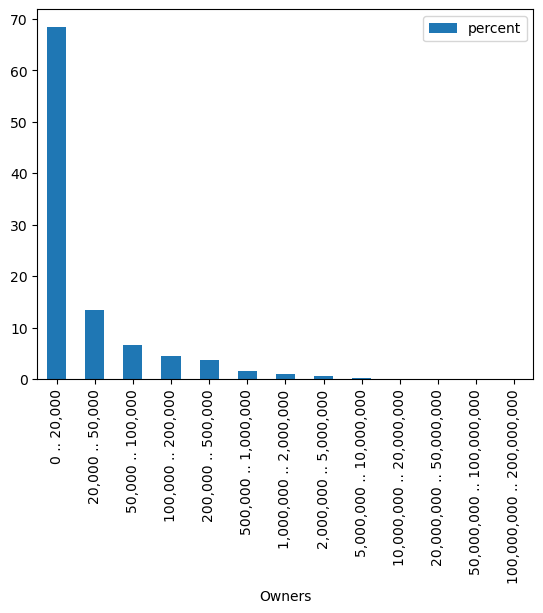

In [80]:
# plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.0f%%')

total_owners.plot(x = 'Owners', y = 'percent', kind = 'bar')

<Axes: ylabel='percent'>

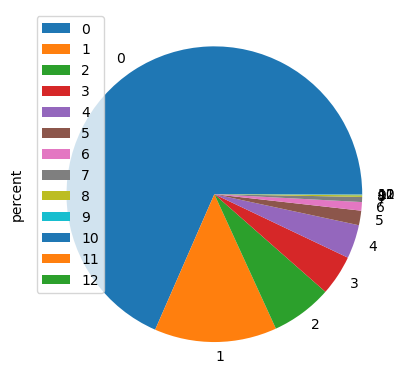

In [81]:
total_owners.plot(x = 'Owners', y = 'percent', kind = 'pie')

In [82]:
# these are all the games with 0 - 20,000 owners with a CURRENT price of $0 
len(zero_to_twenty_thou_owners[zero_to_twenty_thou_owners['Current_Price_$'] == 0])

5042

In [83]:
# these are all the games with 0 - 20,000 owners with a INITIAL price of $0 
len(zero_to_twenty_thou_owners[zero_to_twenty_thou_owners['Initial_Price_$'] == 0])

5042

In [84]:
len(zero_to_twenty_thou_owners[zero_to_twenty_thou_owners['Current_Price_$'] > 0])

43095

In [85]:
len(zero_to_twenty_thou_owners[zero_to_twenty_thou_owners['Initial_Price_$'] > 0])

43095

## All games with less than 20,000 owners whether free-to-play or priced have always remained the same from release of game to current.

In [86]:
len(steam_api_filtered[steam_api_filtered['Current_Price_$'] == 0])

9332

In [87]:
len(steam_api_filtered[steam_api_filtered['Initial_Price_$'] == 0])

9331

In [88]:
# only game in our dataset that started out has having a price and went free-to-play
steam_api_filtered[(steam_api_filtered['Current_Price_$'] == 0) & (steam_api_filtered['Initial_Price_$'] > 0)]

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
2522,1507190,Machinika: Museum,Littlefield Studio,Dear Villagers,2690,213,"200,000 .. 500,000",115,106,0.0,7.99,100.0,1400,7.99,False,2477


In [89]:
zero_to_twenty_thou_owners.head(3)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
22193,1112340,The Dreadful Whispers,Blackthornprod,Blackthornprod,139,20,"0 .. 20,000",0,0,9.99,9.99,0.0,0,0.0,True,119
22194,2490910,å¯Œç”²å¤©ä¸‹5,"T-Time Technology CO., LTD.","T-Time Technology CO., LTD.",87,65,"0 .. 20,000",0,0,7.99,7.99,0.0,55,0.0,True,22
22195,904320,My Holiday,StellarXiela,StellarXiela,183,7,"0 .. 20,000",0,0,3.49,4.99,30.0,0,1.5,True,176


In [90]:
steam_api_wo_999_game = steam_api_filtered[steam_api_filtered['Current_Price_$'] != 999.0]
steam_api_wo_999_game

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True,6001995
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True,399174
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",353,445,39.99,39.99,0.0,7073,0.0,True,111507
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",742,238,29.99,29.99,0.0,22622,0.0,True,261829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,1963990,Deliver Us From Evil (DUFE) - Masquerade,Galen Games,Galen Games,4,2,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,2
70326,1726330,Game Developer Simulator,Phantom Studio,Phantom Studio,3,7,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True,-4
70327,740310,Transmogrify,Odyssey Entertainment,Odyssey Entertainment,21,2,"0 .. 20,000",0,0,14.99,14.99,0.0,0,0.0,True,19
70328,1285350,Easy puzzle: Landscape,Laush Dmitriy Sergeevich,Laush Studio,12,2,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,False,10


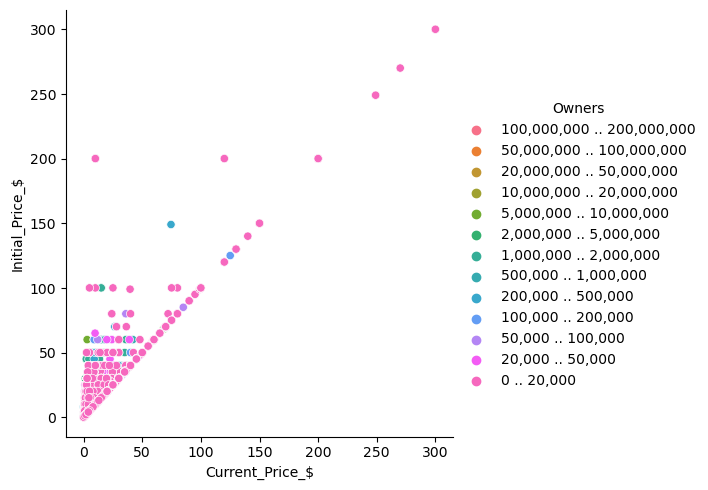

In [91]:
# thisk is the plot WITHOUT the $1000 game since it was such an outliner
sns.relplot(data = steam_api_wo_999_game, x = "Current_Price_$", y = "Initial_Price_$", hue = "Owners")

## There was a huge outliner which is shown below. I removed it from the graph above so I could zoom in on the rest of the data.

In [92]:
# this game really is $1000!
steam_api_filtered[steam_api_filtered['App_Id'] == 1200520]

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
64334,1200520,Ascent Free-Roaming VR Experience,Fury Games,Fury Games,6,1,"0 .. 20,000",0,0,999.0,999.0,0.0,0,0.0,True,5


## Next, let's look at free-to-play games.

In [93]:
# all games that have always been free-to-play with at least 1000 positive reviews
free_games = steam_api_filtered[(steam_api_filtered['Current_Price_$'] == 0) 
                                & (steam_api_filtered['Initial_Price_$'] == 0)]

free_games_merged = steam_2016.merge(free_games, on = 'Name', how = 'outer')
free_games_merged = free_games_merged[free_games_merged['Positive_Reviews'] >= 500000].sort_values('Positive_Reviews', ascending = False)
free_games_merged = free_games_merged.drop(columns = ['QueryID', 'ResponseID', 'AboutText', 'DetailedDescrip', ])

In [94]:
# all free games
free_games

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.0,0.0,0.0,851269,0.0,True,1428249
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.0,0.0,0.0,1242112,0.0,True,6001995
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.0,0.0,0.0,396605,0.0,True,399174
5,1172470,Apex Legends,Respawn,Electronic Arts,645151,183785,"50,000,000 .. 100,000,000",1042,376,0.0,0.0,0.0,219745,0.0,False,461366
6,440,Team Fortress 2,Valve,Valve,980557,66218,"50,000,000 .. 100,000,000",1756,309,0.0,0.0,0.0,98632,0.0,True,914339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70313,553140,Green Mirror,"Bad2theBone, Glumpy Fish",Glumpy Fish,0,0,"0 .. 20,000",0,0,0.0,0.0,0.0,0,0.0,False,0
70314,201930,Jamestown IGF,NaN,NaN,0,0,"0 .. 20,000",0,0,0.0,0.0,0.0,0,0.0,False,0
70315,675330,Space Crawl,Hyperfine Studio,Hyperfine Studio,0,0,"0 .. 20,000",0,0,0.0,0.0,0.0,0,0.0,True,0
70316,46470,Grotesque Tactics: Evil Heroes - Dev,NaN,NaN,0,0,"0 .. 20,000",0,0,0.0,0.0,0.0,0,0.0,False,0


In [95]:
# top 7 games with at least 500,000 positive reviews
free_games_merged

,Name,ReleaseDate,ReleaseYear,ReleaseMonth,RequiredAge,DLCCount,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,AchievementCount,ControllerSupport,IsFree,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryVRSupport,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceCurrency,PriceInitial_2016,PriceFinal_2016,SupportedLanguages,App_Id,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
25,Counter-Strike: Global Offensive,2010-07-19,2010,July,0.0,0.0,77.0,14625.0,10.0,4819841.0,4819841.0,66.0,False,True,False,True,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,,0.00,0.00,English,730.0,Valve,Valve,7034475.0,1032480.0,"100,000,000 .. 200,000,000",593.0,286.0,0.0,0.0,0.0,1242112.0,0.0,True,6001995.0
22,Dota 2,2009-11-16,2009,November,0.0,0.0,89.0,140726.0,17.0,15574539.0,13583400.0,70.0,True,False,False,True,True,True,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,19.99,19.99,Danish Dutch English* Finnish French* German* ...,570.0,Valve,Valve,1836663.0,408414.0,"100,000,000 .. 200,000,000",2477.0,2060.0,0.0,0.0,0.0,851269.0,0.0,True,1428249.0
13194,PUBG: BATTLEGROUNDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578080.0,"KRAFTON, Inc.","KRAFTON, Inc.",1380986.0,981812.0,"50,000,000 .. 100,000,000",1028.0,751.0,0.0,0.0,0.0,396605.0,0.0,True,399174.0
19,Team Fortress 2,2007-10-10,2007,October,0.0,1.0,90.0,6104.0,5.0,5735062.0,2240435.0,22.0,False,False,False,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,7.99,7.99,English* French* German* Russian* Danish Dutch...,440.0,Valve,Valve,980557.0,66218.0,"50,000,000 .. 100,000,000",1756.0,309.0,0.0,0.0,0.0,98632.0,0.0,True,914339.0
13195,Apex Legends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1172470.0,Respawn,Electronic Arts,645151.0,183785.0,"50,000,000 .. 100,000,000",1042.0,376.0,0.0,0.0,0.0,219745.0,0.0,False,461366.0
13205,Rocket League,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252950.0,Psyonix LLC,Psyonix LLC,508261.0,70211.0,"10,000,000 .. 20,000,000",492.0,282.0,0.0,0.0,0.0,25889.0,0.0,True,438050.0
1983,Warframe,2012-10-22,2012,October,0.0,1.0,77.0,1353.0,29.0,626289.0,291084.0,25.0,True,False,False,True,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,USD,14.99,14.99,English German French Italian Spanish Japanese...,230410.0,Digital Extremes,Digital Extremes,505599.0,77119.0,"20,000,000 .. 50,000,000",1008.0,562.0,0.0,0.0,0.0,46615.0,0.0,True,428480.0


In [96]:
pubg = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\PUBG.CSV')
pubg = pubg.rename(columns = {'name' : 'Name'})

In [97]:
apex_legends = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\APEX_LEGENDS.CSV')
apex_legends = apex_legends.rename(columns = {'name' : 'Name'})

In [98]:
rocket_league = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\ROCKET_LEAGUE.CSV')
rocket_league = rocket_league.rename(columns = {'name' : 'Name'})

In [99]:
added_games = pd.concat([pubg, apex_legends, rocket_league])
added_games = added_games.replace(np.nan, '-------')
added_games

,appid,Name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Survival,Shooter,Battle Royale,Multiplayer,FPS,PvP,Third-Person Shooter,Action,Online Co-Op,Tactical,Co-op,First-Person,Strategy,Early Access,Competitive,Third Person,Team-Based,Difficult,Simulation,Stealth,Free to Play,Hero Shooter,Sci-fi,Loot,Character Customization,Funny,Lore-Rich,Cyberpunk,Cinematic,Football,Sports,Racing,Football _1,Fast-Paced,Great Soundtrack,Local Multiplayer,Split Screen,Local Co-Op,Singleplayer,4 Player Local,Casual,Indie
0,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",-------,1384764,983242,0,"50,000,000 .. 100,000,000",23629,611,9441,225,0,0,0,287938,"English, Korean, Simplified Chinese, French, G...","Action, Adventure, Massively Multiplayer, Free...",14626.0,12485.0,10698.0,10655,8248.0,7599.0,7206.0,5926,5268.0,4973.0,4246,4004.0,3049.0,2802.0,2356.0,2305.0,2019,1696.0,1342.0,1254.0,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------
0,1172470,Apex Legends,Respawn,Electronic Arts,-------,646561,185190,0,"50,000,000 .. 100,000,000",6726,631,1238,321,0,0,0,133691,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Free to Play",476.0,1251.0,1367.0,1349,1289.0,871.0,-------,776,-------,535.0,429,1048.0,-------,-------,-------,-------,708,-------,-------,-------,1979.0,713.0,486.0,471.0,462.0,436.0,358.0,346.0,283.0,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------,-------
0,252950,Rocket League,Psyonix LLC,Psyonix LLC,-------,508350,70379,0,"10,000,000 .. 20,000,000",17962,476,3110,289,0,0,0,28988,"English, French, Italian, German, Spanish - Sp...","Action, Indie, Racing, Sports",-------,-------,-------,6583,-------,-------,-------,1935,2859.0,-------,2141,-------,-------,-------,4556.0,-------,3411,-------,-------,-------,-------,-------,-------,-------,-------,1896.0,-------,-------,-------,5224.0,3996.0,3878.0,2413.0,2203.0,1668.0,1616.0,1488.0,1349.0,1232.0,1212.0,1202.0,879.0


In [100]:
# top 3 Developers of free-to-play games
free_games.value_counts('Developer').reset_index().head(3)

,Developer,count
0,MAGIX Software GmbH,50
1,CyberLink,31
2,Telltale Games,27


In [101]:
# top 3 Publisher of free-to-play games
free_games.value_counts('Publisher').reset_index().head(3)

,Publisher,count
0,MAGIX Software GmbH,51
1,DigiPen Institute of Technology,36
2,Electronic Arts,25


In [102]:
free_games.sort_values('Positive_Reviews', ascending = False)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.0,0.0,0.0,1242112,0.0,True,6001995
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.0,0.0,0.0,851269,0.0,True,1428249
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.0,0.0,0.0,396605,0.0,True,399174
6,440,Team Fortress 2,Valve,Valve,980557,66218,"50,000,000 .. 100,000,000",1756,309,0.0,0.0,0.0,98632,0.0,True,914339
5,1172470,Apex Legends,Respawn,Electronic Arts,645151,183785,"50,000,000 .. 100,000,000",1042,376,0.0,0.0,0.0,219745,0.0,False,461366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65229,981320,Whale Island,Snefru,Snefru,0,1,"0 .. 20,000",0,0,0.0,0.0,0.0,0,0.0,True,-1
65205,1108360,AOS Manager,GASF Studio,GASF Studio,0,1,"0 .. 20,000",0,0,0.0,0.0,0.0,0,0.0,True,-1
65187,1189970,Runoveryou,no one to blame,no one to blame,0,2,"0 .. 20,000",0,0,0.0,0.0,0.0,0,0.0,True,-2
65182,1231180,MEDAL OF LEGENDS,SEIF EL DEEN SOLIMAN,SEIF EL DEEN SOLIMAN,0,3,"0 .. 20,000",0,0,0.0,0.0,0.0,0,0.0,True,-3


In [103]:
# free_games_filtered.value_counts('Developer').reset_index()

In [104]:
# free_games_filtered.value_counts('Publisher').reset_index()

In [105]:
# free_games_filtered.value_counts(['Developer', 'Publisher']).reset_index()

In [106]:
steam_api_filtered[steam_api_filtered['Developer'] == 'Choice of Games']

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
8865,339350,Choice of Robots,Choice of Games,Choice of Games,1906,73,"50,000 .. 100,000",0,0,6.99,6.99,0.0,4,0.0,True,1833
11079,1290270,Vampire: The Masquerade â€” Night Road,Choice of Games,Choice of Games,531,53,"50,000 .. 100,000",0,0,11.99,11.99,0.0,8,0.0,True,478
14354,299540,Heroes Rise: The Prodigy,Choice of Games,Choice of Games,323,77,"20,000 .. 50,000",0,0,4.99,4.99,0.0,1,0.0,True,246
17274,1585050,Cliffhanger: Challenger of Tomorrow,Choice of Games,Choice of Games,6,1,"20,000 .. 50,000",0,0,6.99,6.99,0.0,0,0.0,True,5
17412,2186380,Teahouse of the Gods,Choice of Games,Choice of Games,5,5,"20,000 .. 50,000",0,0,6.99,6.99,0.0,0,0.0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69691,684060,The Hero Unmasked!,Choice of Games,Choice of Games,21,2,"0 .. 20,000",0,0,6.99,6.99,0.0,0,0.0,True,19
69720,1080250,Fool!,Choice of Games,Choice of Games,22,2,"0 .. 20,000",0,0,7.99,7.99,0.0,0,0.0,True,20
69749,868780,"I, Cyborg",Choice of Games,Choice of Games,24,6,"0 .. 20,000",0,0,6.99,6.99,0.0,0,0.0,True,18
69764,839940,Silverworld,Choice of Games,Choice of Games,25,1,"0 .. 20,000",0,0,7.99,7.99,0.0,1,0.0,True,24


In [107]:
steam_api_filtered[steam_api_filtered['Current_Price_$'] != 0].sort_values('Current_Price_$')

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
29072,1836120,QUICKERFLAK,Walter Machado,Walter Machado,198,14,"0 .. 20,000",0,0,0.27,0.99,73.0,0,0.72,True,184
23308,976120,WARPZONE DRIFTER,Walter Machado,Walter Machado,82,20,"0 .. 20,000",0,0,0.27,0.99,73.0,0,0.72,True,62
40292,2010110,QUICKERFLAK_RUTHLESSMOD,Walter Machado,Walter Machado,37,4,"0 .. 20,000",0,0,0.27,0.99,73.0,0,0.72,True,33
7383,701470,TTV2,Walter Machado,Walter Machado,161,17,"100,000 .. 200,000",0,0,0.27,0.99,73.0,1,0.72,True,144
70037,1114530,TTV3,Walter Machado,Walter Machado,87,13,"0 .. 20,000",0,0,0.27,0.99,73.0,0,0.72,True,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57299,438450,3DF Zephyr Lite Steam Edition,3Dflow SRL,3Dflow SRL,69,2,"0 .. 20,000",0,0,249.00,249.00,0.0,3,0.00,True,67
49773,502570,Houdini Indie,SideFX,SideFX,201,17,"0 .. 20,000",0,0,269.99,269.99,0.0,65,0.00,True,184
56194,253670,Aartform Curvy 3D 3.0,Aartform,Aartform,32,13,"0 .. 20,000",0,0,299.90,299.90,0.0,0,0.00,True,19
68840,1105450,Aartform Curvy 3D 4.0,Aartform Ltd,Aartform Ltd,10,2,"0 .. 20,000",0,0,299.99,299.99,0.0,0,0.00,True,8


In [108]:
# steam_api_filtered[steam_api_filtered['Owners'] == '0 .. 20,000'].sort_values('Avg_Playtime_Two_Weeks', ascending = False).head(10)

In [109]:
# steam_api_filtered[steam_api_filtered['Name'] == 'Balatro']

# Let's look at the Top 5 Free-to-Play and Non-Free games with more than 500,000 positive reviews.

In [110]:
#20 total... non-free games with at least 500000 pos reviews
# filtering the top 5

top_5_pos_reviews_paid = steam_api_filtered[(steam_api_filtered['Positive_Reviews'] >= 500000)
                  & (steam_api_filtered['Current_Price_$'] > 0)
                  & (steam_api_filtered['Initial_Price_$'] > 0)].sort_values('Positive_Reviews', ascending = False).head(5)
top_5_pos_reviews_paid

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
8,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,1557234,236827,"50,000,000 .. 100,000,000",598,253,29.98,29.98,0.0,135799,0.0,False,1320407
15,105600,Terraria,Re-Logic,Re-Logic,1257156,30601,"20,000,000 .. 50,000,000",1233,177,9.99,9.99,0.0,32126,0.0,True,1226555
18,359550,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,1096417,190821,"20,000,000 .. 50,000,000",691,289,7.99,19.99,60.0,71136,12.0,False,905596
21,4000,Garry's Mod,Facepunch Studios,Valve,1034030,34908,"20,000,000 .. 50,000,000",542,59,9.99,9.99,0.0,31395,0.0,False,999122
9,550,Left 4 Dead 2,Valve,Valve,834854,21169,"50,000,000 .. 100,000,000",187,78,9.99,9.99,0.0,25564,0.0,True,813685


In [111]:
top_5_pos_reviews_paid.value_counts(['Developer', 'Publisher']).reset_index()

,Developer,Publisher,count
0,Facepunch Studios,Valve,1
1,Re-Logic,Re-Logic,1
2,Rockstar North,Rockstar Games,1
3,Ubisoft Montreal,Ubisoft,1
4,Valve,Valve,1


In [112]:
top_5_pos_reviews_paid.value_counts('Owners').reset_index()

,Owners,count
0,"20,000,000 .. 50,000,000",3
1,"50,000,000 .. 100,000,000",2


In [113]:
top_5_pos_reviews_paid['Avg_Playtime_Two_Weeks'].sum()

3251

In [114]:
top_5_pos_reviews_paid['Median_Playtime_Two_Weeks'].sum()

856

In [115]:
total_paid_pos = top_5_pos_reviews_paid['Positive_Reviews'].sum()
total_paid_pos

5779691

In [116]:
total_paid_neg = top_5_pos_reviews_paid['Negative_Reviews'].sum()
total_paid_neg

514326

In [117]:
difference_paid_pos_neg = total_paid_pos - total_paid_neg
difference_paid_pos_neg

5265365

In [118]:
# 7 total... free-to-play games with at least 500,000 pos reviews
# filtering the top 5

top_5_pos_reviews_free = steam_api_filtered[(steam_api_filtered['Positive_Reviews'] >= 500000)
                  & (steam_api_filtered['Current_Price_$'] == 0)
                  & (steam_api_filtered['Initial_Price_$'] == 0)].sort_values('Positive_Reviews', ascending = False).head(5)
top_5_pos_reviews_free

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.0,0.0,0.0,1242112,0.0,True,6001995
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.0,0.0,0.0,851269,0.0,True,1428249
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.0,0.0,0.0,396605,0.0,True,399174
6,440,Team Fortress 2,Valve,Valve,980557,66218,"50,000,000 .. 100,000,000",1756,309,0.0,0.0,0.0,98632,0.0,True,914339
5,1172470,Apex Legends,Respawn,Electronic Arts,645151,183785,"50,000,000 .. 100,000,000",1042,376,0.0,0.0,0.0,219745,0.0,False,461366


In [119]:
top_5_pos_reviews_free.value_counts(['Developer', 'Publisher']).reset_index()

,Developer,Publisher,count
0,Valve,Valve,3
1,"KRAFTON, Inc.","KRAFTON, Inc.",1
2,Respawn,Electronic Arts,1


In [120]:
top_5_pos_reviews_free.value_counts('Owners').reset_index()

,Owners,count
0,"50,000,000 .. 100,000,000",3
1,"100,000,000 .. 200,000,000",2


In [121]:
top_5_pos_reviews_free['Avg_Playtime_Two_Weeks'].sum()

6896

In [122]:
top_5_pos_reviews_free['Median_Playtime_Two_Weeks'].sum()

3782

In [123]:
total_free_pos = top_5_pos_reviews_free['Positive_Reviews'].sum()
total_free_pos

11877832

In [124]:
total_free_neg = top_5_pos_reviews_free['Negative_Reviews'].sum()
total_free_neg

2672709

In [125]:
difference_free_pos_neg = total_free_pos - total_free_neg
difference_free_pos_neg

9205123

### 5,779,691 total positive reviews and 514,326 total negative reviews for paid games.

### 11,877,832 total positive reviews and 2,672,709 total negative reviews for free games.

### 5,265,365 more positive reviews than there are negative reviews for paid games.

### 9,205,123 more positive reviews than there are negative reviews for free games.

In [126]:
apex_legends = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\apex_legends.CSV')

In [127]:
counter_strike = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Counter_strike.CSV')

In [128]:
dota_2 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\dota_2.CSV')

In [129]:
garrys_mod = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Garrys_Mod.CSV')

In [130]:
gta = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\gta.CSV')

In [131]:
left_4_dead_2 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Left_4_dead_2.CSV')

In [132]:
pubg = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\pubg.CSV')

In [133]:
team_fortress = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\team_fortress.CSV')

In [134]:
terraria = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Terraria.CSV')

In [135]:
tom_clancy = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Tom_Clancy.CSV')

In [136]:
top_10_free_paid = pd.concat([apex_legends, counter_strike, dota_2, garrys_mod, gta, left_4_dead_2, pubg, team_fortress, terraria, tom_clancy])

In [137]:
top_10_free_paid

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Battle Royale,Multiplayer,FPS,Shooter,First-Person,PvP,Action,Hero Shooter,Team-Based,Tactical,Sci-fi,Survival,Loot,Character Customization,Funny,Co-op,Lore-Rich,Cyberpunk,Cinematic,Competitive,e-sports,Online Co-Op,Strategy,Military,War,Difficult,Trading,Realistic,Fast-Paced,Moddable,MOBA,RTS,RPG,Tower Defense,Fantasy,Replay Value,Action RPG,Simulation,Sandbox,Physics,Building,Casual,Singleplayer,Comedy,Indie,Exploration,Open World,Crime,Automobile Sim,Third Person,Mature,Adventure,Third-Person Shooter,Racing,Atmospheric,Great Soundtrack,Zombies,Horror,Gore,Survival Horror,Post-apocalyptic,Local Co-Op,Early Access,Stealth,Class-Based,Cartoony,Robots,Cartoon,Crafting,Open World Survival Craft,2D,Pixel Graphics,Platformer,Destruction,3D
0,1172470,Apex Legends,Respawn,Electronic Arts,NaN,646561,185190,0,"50,000,000 .. 100,000,000",6726,631,1238,321,0,0,0,133691,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Free to Play",1979.0,1367.0,1349,1289.0,1251.0,1048.0,871.0,776,713.0,708.0,535.0,486.0,476.0,471.0,462.0,436.0,429,358.0,346.0,283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,730,Counter-Strike: Global Offensive,Valve,Valve,NaN,7042784,1034886,0,"100,000,000 .. 200,000,000",17061,745,3581,280,0,0,0,1003113,"English, Czech, Danish, Dutch, Finnish, French...","Action, Free to Play",NaN,NaN,61821,90109.0,64818.0,39102.0,34173.0,47184,NaN,46077.0,41055.0,NaN,NaN,NaN,NaN,NaN,30051,NaN,NaN,NaN,52909.0,43167.0,33722.0,29913.0,28522.0,27837.0,25820.0,25494.0,25271.0,25193.0,6460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,570,Dota 2,Valve,Valve,NaN,1843054,410804,0,"200,000,000 .. 500,000,000",34766,1640,5551,830,0,0,0,612102,"English, Bulgarian, Czech, Danish, Dutch, Finn...","Action, Strategy, Free to Play",59592.0,NaN,15168,NaN,NaN,NaN,5952.0,7845,NaN,10831.0,NaN,NaN,NaN,NaN,2875.0,NaN,4231,NaN,NaN,NaN,8176.0,11640.0,7369.0,14106.0,NaN,NaN,5236.0,NaN,NaN,NaN,NaN,19977.0,4043.0,3723.0,3712.0,3689.0,2715.0,2412.0,1940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4000,Garry's Mod,Facepunch Studios,Valve,NaN,1036289,34975,0,"20,000,000 .. 50,000,000",4480,171,713,104,999,999,0,29049,"English, French, Italian, German, Spanish - Sp...","Casual, Indie, Simulation",NaN,NaN,14263,12724.0,12714.0,12755.0,8908.0,12708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12781.0,12724,NaN,NaN,NaN,NaN,NaN,12734.0,NaN,NaN,NaN,NaN,NaN,8887.0,NaN,14275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12725.0,18409.0,14255.0,14236.0,13070.0,12759.0,12708.0,12670.0,8864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,NaN,1568932,237576,0,"50,000,000 .. 100,000,000",11562,507,5276,134,2040,2040,0,114080,"English, French, Italian, German, Spanish - Sp...","Action, Adventure",NaN,NaN,21351,NaN,14686.0,18062.0,NaN,23189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9239.0,10089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9851.0,NaN,NaN,NaN,12263.0,8463.0,NaN,NaN,32016.0,19076.0,18585.0,18421.0,14770.0,13436.0,11808.0,11408.0,9817.0,8598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,550,Left 4 Dead 2,Valve,Valve,NaN,836632,21261,0,"50,000,000 .. 100,000,000",1735,62,1336,29,999,999,0,16510,"Danish, Dutch, English, Finnish, French, Germa...",Action,NaN,NaN,9286,9944.

In [138]:
top_10_free_paid = top_10_free_paid.rename(
    columns = {'appid' : 'App_Id',
               'name' : 'Name',
               'developer' : 'Developer',
               'publisher' : 'Publisher',
               'score_rank' : 'Score_Rank',
               'positive' : 'Postive_Reviews',
               'negative' : 'Negative_Reviews',
               'userscore' : 'Userscore',
               'owners' : 'Owners',
               'average_forever' : 'Avg_Playtime_Lifetime',
               'average_2weeks' : 'Avg_Playtime_Two_Weeks',
               'median_forever' : 'Median_Playtime_Lifetime',
               'median_2weeks' : 'Median_Playtime_Two_Weeks',
               'price' : 'Current_Price',
               'initialprice' : 'Initial_Price',
               'discount' : 'Discount',
               'ccu' : 'Peak_CCU',
               'languages' : 'Languages',
               'genre' : 'Genre'})

def date_of_release(Name):
    if Name == 'Counter-Strike: Global Offensive':
        return '08-21-2021'
    elif Name == 'Dota 2':
        return '07-9-2013'
    elif Name == 'Grand Theft Auto V':
        return '09-17-2013'
    elif Name == 'PUBG: BATTLEGROUNDS':
        return '03-23-2017'
    elif Name == 'Terraria':
        return '05-16-2011'
    elif Name == "Tom Clancy's Rainbow Six Siege":
        return '12-01-2015'
    elif Name == "Garry's Mod":
        return '12-01-2004'
    elif Name == 'Team Fortress 2':
        return '10-10-2007'
    elif Name == 'Left 4 Dead 2':
        return '11-01-2009'
    elif Name == 'Apex Legends':
        return '04-04-2019'
    else:
        return 'NaN'

top_10_free_paid['Date_of_Release'] = top_10_free_paid['Name'].apply(date_of_release)

top_10_free_paid = top_10_free_paid.drop(columns = ['Score_Rank', 'Postive_Reviews', 'Negative_Reviews',
                                                   'Userscore', 'Avg_Playtime_Lifetime', 'Median_Playtime_Lifetime',
                                                   'Peak_CCU', 'Avg_Playtime_Two_Weeks', 'Median_Playtime_Two_Weeks',
                                                   'Current_Price', 'Initial_Price', 'Discount']).reset_index()

# top_10_free_paid = string.replace('Tom Clancy's Rainbow Six Siege')

# top_10_free_paid = top_10_free_paid.drop(columns = ['Avg_Playtime_Lifetime'])
# top_10_free_paid = top_10_free_paid.drop(columns = ['Median_Playtime_Lifetime'])
# top_10_free_paid = top_10_free_paid.drop(columns = ['QueryID', 'ResponseID', 'AboutText', 'DetailedDescrip', 'Score_Rank',
#                                                         'Userscore', ])

In [139]:
# top_10_free_paid.sort_values('Postive_Reviews', ascending = False)

In [140]:
# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Project_Data\Capstone\top_10_free_paid.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# top_10_free_paid.to_csv(filepath)  

In [141]:
top_10_free_paid

,index,App_Id,Name,Developer,Publisher,Owners,Languages,Genre,Free to Play,Battle Royale,Multiplayer,FPS,Shooter,First-Person,PvP,Action,Hero Shooter,Team-Based,Tactical,Sci-fi,Survival,Loot,Character Customization,Funny,Co-op,Lore-Rich,Cyberpunk,Cinematic,Competitive,e-sports,Online Co-Op,Strategy,Military,War,Difficult,Trading,Realistic,Fast-Paced,Moddable,MOBA,RTS,RPG,Tower Defense,Fantasy,Replay Value,Action RPG,Simulation,Sandbox,Physics,Building,Casual,Singleplayer,Comedy,Indie,Exploration,Open World,Crime,Automobile Sim,Third Person,Mature,Adventure,Third-Person Shooter,Racing,Atmospheric,Great Soundtrack,Zombies,Horror,Gore,Survival Horror,Post-apocalyptic,Local Co-Op,Early Access,Stealth,Class-Based,Cartoony,Robots,Cartoon,Crafting,Open World Survival Craft,2D,Pixel Graphics,Platformer,Destruction,3D,Date_of_Release
0,0,1172470,Apex Legends,Respawn,Electronic Arts,"50,000,000 .. 100,000,000","English, French, Italian, German, Spanish - Sp...","Action, Adventure, Free to Play",1979.0,1367.0,1349,1289.0,1251.0,1048.0,871.0,776,713.0,708.0,535.0,486.0,476.0,471.0,462.0,436.0,429,358.0,346.0,283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04-04-2019
1,0,730,Counter-Strike: Global Offensive,Valve,Valve,"100,000,000 .. 200,000,000","English, Czech, Danish, Dutch, Finnish, French...","Action, Free to Play",NaN,NaN,61821,90109.0,64818.0,39102.0,34173.0,47184,NaN,46077.0,41055.0,NaN,NaN,NaN,NaN,NaN,30051,NaN,NaN,NaN,52909.0,43167.0,33722.0,29913.0,28522.0,27837.0,25820.0,25494.0,25271.0,25193.0,6460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-21-2021
2,0,570,Dota 2,Valve,Valve,"200,000,000 .. 500,000,000","English, Bulgarian, Czech, Danish, Dutch, Finn...","Action, Strategy, Free to Play",59592.0,NaN,15168,NaN,NaN,NaN,5952.0,7845,NaN,10831.0,NaN,NaN,NaN,NaN,2875.0,NaN,4231,NaN,NaN,NaN,8176.0,11640.0,7369.0,14106.0,NaN,NaN,5236.0,NaN,NaN,NaN,NaN,19977.0,4043.0,3723.0,3712.0,3689.0,2715.0,2412.0,1940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-9-2013
3,0,4000,Garry's Mod,Facepunch Studios,Valve,"20,000,000 .. 50,000,000","English, French, Italian, German, Spanish - Sp...","Casual, Indie, Simulation",NaN,NaN,14263,12724.0,12714.0,12755.0,8908.0,12708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12781.0,12724,NaN,NaN,NaN,NaN,NaN,12734.0,NaN,NaN,NaN,NaN,NaN,8887.0,NaN,14275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12725.0,18409.0,14255.0,14236.0,13070.0,12759.0,12708.0,12670.0,8864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-01-2004
4,0,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,"50,000,000 .. 100,000,000","English, French, Italian, German, Spanish - Sp...","Action, Adventure",NaN,NaN,21351,NaN,14686.0,18062.0,NaN,23189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9239.0,10089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9851.0,NaN,NaN,NaN,12263.0,8463.0,NaN,NaN,32016.0,19076.0,18585.0,18421.0,14770.0,13436.0,11808.0,11408.0,9817.0,8598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09-17-2013
5,0,550,Left 4 Dead 2,Valve,Valve,"50,000,000 .. 100,000,000","Danish, Dutch, English, Finnish, French, Germa...",Action,NaN,NaN,9286,9944.0,6988.0,4502.0,NaN,6612,NaN,3555.0,1980.0,NaN,5645.0,NaN,NaN,NaN,11261,NaN,NaN,NaN,NaN,NaN,6695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3019.0,NaN,NaN,NaN,NaN,NaN,2062.0,NaN,NaN,NaN,NaN,NaN,NaN,2404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2164.0,NaN,NaN,NaN,NaN,21032.0,5385.0,4211.0,2961.0,2863.0,2108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11-01-2009
6,0,578080,P

In [142]:
top_10_free_paid.sort_values('Languages')

,index,App_Id,Name,Developer,Publisher,Owners,Languages,Genre,Free to Play,Battle Royale,Multiplayer,FPS,Shooter,First-Person,PvP,Action,Hero Shooter,Team-Based,Tactical,Sci-fi,Survival,Loot,Character Customization,Funny,Co-op,Lore-Rich,Cyberpunk,Cinematic,Competitive,e-sports,Online Co-Op,Strategy,Military,War,Difficult,Trading,Realistic,Fast-Paced,Moddable,MOBA,RTS,RPG,Tower Defense,Fantasy,Replay Value,Action RPG,Simulation,Sandbox,Physics,Building,Casual,Singleplayer,Comedy,Indie,Exploration,Open World,Crime,Automobile Sim,Third Person,Mature,Adventure,Third-Person Shooter,Racing,Atmospheric,Great Soundtrack,Zombies,Horror,Gore,Survival Horror,Post-apocalyptic,Local Co-Op,Early Access,Stealth,Class-Based,Cartoony,Robots,Cartoon,Crafting,Open World Survival Craft,2D,Pixel Graphics,Platformer,Destruction,3D,Date_of_Release
5,0,550,Left 4 Dead 2,Valve,Valve,"50,000,000 .. 100,000,000","Danish, Dutch, English, Finnish, French, Germa...",Action,NaN,NaN,9286,9944.0,6988.0,4502.0,NaN,6612,NaN,3555.0,1980.0,NaN,5645.0,NaN,NaN,NaN,11261,NaN,NaN,NaN,NaN,NaN,6695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3019.0,NaN,NaN,NaN,NaN,NaN,2062.0,NaN,NaN,NaN,NaN,NaN,NaN,2404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2164.0,NaN,NaN,NaN,NaN,21032.0,5385.0,4211.0,2961.0,2863.0,2108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11-01-2009
2,0,570,Dota 2,Valve,Valve,"200,000,000 .. 500,000,000","English, Bulgarian, Czech, Danish, Dutch, Finn...","Action, Strategy, Free to Play",59592.0,NaN,15168,NaN,NaN,NaN,5952.0,7845,NaN,10831.0,NaN,NaN,NaN,NaN,2875.0,NaN,4231,NaN,NaN,NaN,8176.0,11640.0,7369.0,14106.0,NaN,NaN,5236.0,NaN,NaN,NaN,NaN,19977.0,4043.0,3723.0,3712.0,3689.0,2715.0,2412.0,1940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-9-2013
1,0,730,Counter-Strike: Global Offensive,Valve,Valve,"100,000,000 .. 200,000,000","English, Czech, Danish, Dutch, Finnish, French...","Action, Free to Play",NaN,NaN,61821,90109.0,64818.0,39102.0,34173.0,47184,NaN,46077.0,41055.0,NaN,NaN,NaN,NaN,NaN,30051,NaN,NaN,NaN,52909.0,43167.0,33722.0,29913.0,28522.0,27837.0,25820.0,25494.0,25271.0,25193.0,6460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-21-2021
7,0,440,Team Fortress 2,Valve,Valve,"50,000,000 .. 100,000,000","English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62521.0,NaN,22598,15503.0,12582.0,7809.0,NaN,11981,60926.0,9294.0,3941.0,NaN,NaN,NaN,NaN,9231.0,5742,NaN,NaN,NaN,7018.0,NaN,7240.0,NaN,NaN,NaN,NaN,6748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9687.0,7012.0,4862.0,3884.0,3645.0,NaN,NaN,NaN,NaN,NaN,NaN,10-10-2007
3,0,4000,Garry's Mod,Facepunch Studios,Valve,"20,000,000 .. 50,000,000","English, French, Italian, German, Spanish - Sp...","Casual, Indie, Simulation",NaN,NaN,14263,12724.0,12714.0,12755.0,8908.0,12708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12781.0,12724,NaN,NaN,NaN,NaN,NaN,12734.0,NaN,NaN,NaN,NaN,NaN,8887.0,NaN,14275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12725.0,18409.0,14255.0,14236.0,13070.0,12759.0,12708.0,12670.0,8864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-01-2004
9,0,359550,Tom Clancy's Rainbow Six Siege,Ubisoft Montreal,Ubisoft,"20,000,000 .. 50,000,000","English, French, Italian, German, Spanish - Sp...",Action,NaN,NaN,8959,9701.0,8952.0,4846.0,9083.0,8879,8839.0,5580.0,8958.0,NaN,NaN,NaN,NaN,NaN,4829,NaN,NaN,NaN,8906.0,9028.0,8894.0,4862.0,4922.0,4841.0,2066.0,NaN,4831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4822.0,1865.0,12-01-2015
0,0,1172470,Apex Legends,Respawn,Elec

In [143]:
total_lang = pd.get_dummies(top_10_free_paid['Languages'].str.split(', ').apply(pd.Series).stack()).sum().reset_index().rename(
    columns = {'index' : 'Langauge', 0 : 'Count'}).sort_values('Count', ascending = False)

In [144]:
total_lang

,Langauge,Count
12,Italian,10
23,Spanish - Spain,10
21,Simplified Chinese,10
20,Russian,10
5,English,10
17,Portuguese - Brazil,10
7,French,10
8,German,10
16,Polish,10
13,Japanese,9


In [145]:
# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Project_Data\Capstone\total_lang.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# total_lang.to_csv(filepath)  

In [146]:
# steam_api_filtered

In [147]:
games_names_top_10 = top_10_free_paid['Name'].unique().tolist()
games_names_top_10

['Apex Legends',
 'Counter-Strike: Global Offensive',
 'Dota 2',
 "Garry's Mod",
 'Grand Theft Auto V',
 'Left 4 Dead 2',
 'PUBG: BATTLEGROUNDS',
 'Team Fortress 2',
 'Terraria',
 "Tom Clancy's Rainbow Six Siege"]

In [148]:
games_i_need = steam_api_filtered[steam_api_filtered['Name'].isin(games_names_top_10)]
games_i_need = games_i_need.drop(columns = ['Owners', 'Developer', 'Publisher'])
games_i_need

,App_Id,Name,Positive_Reviews,Negative_Reviews,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
0,570,Dota 2,1836663,408414,2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249
1,730,Counter-Strike: Global Offensive,7034475,1032480,593,286,0.00,0.00,0.0,1242112,0.0,True,6001995
2,578080,PUBG: BATTLEGROUNDS,1380986,981812,1028,751,0.00,0.00,0.0,396605,0.0,True,399174
5,1172470,Apex Legends,645151,183785,1042,376,0.00,0.00,0.0,219745,0.0,False,461366
6,440,Team Fortress 2,980557,66218,1756,309,0.00,0.00,0.0,98632,0.0,True,914339
8,271590,Grand Theft Auto V,1557234,236827,598,253,29.98,29.98,0.0,135799,0.0,False,1320407
9,550,Left 4 Dead 2,834854,21169,187,78,9.99,9.99,0.0,25564,0.0,True,813685
15,105600,Terraria,1257156,30601,1233,177,9.99,9.99,0.0,32126,0.0,True,1226555
18,359550,Tom Clancy's Rainbow Six Siege,1096417,190821,691,289,7.99,19.99,60.0,71136,12.0,False,905596
21,4000,Garry's Mod,1034030,34908,542,59,9.99,9.99,0.0,31395,0.0,False,999122


In [149]:
# maksdmasdkl = pd.merge([top_10_free_paid, games_i_need])

main_top_10_paid_free = pd.merge(
    left = top_10_free_paid,
    right = games_i_need,
    on = ['App_Id', 'Name'])

In [150]:
main_top_10_paid_free

,index,App_Id,Name,Developer,Publisher,Owners,Languages,Genre,Free to Play,Battle Royale,Multiplayer,FPS,Shooter,First-Person,PvP,Action,Hero Shooter,Team-Based,Tactical,Sci-fi,Survival,Loot,Character Customization,Funny,Co-op,Lore-Rich,Cyberpunk,Cinematic,Competitive,e-sports,Online Co-Op,Strategy,Military,War,Difficult,Trading,Realistic,Fast-Paced,Moddable,MOBA,RTS,RPG,Tower Defense,Fantasy,Replay Value,Action RPG,Simulation,Sandbox,Physics,Building,Casual,Singleplayer,Comedy,Indie,Exploration,Open World,Crime,Automobile Sim,Third Person,Mature,Adventure,Third-Person Shooter,Racing,Atmospheric,Great Soundtrack,Zombies,Horror,Gore,Survival Horror,Post-apocalyptic,Local Co-Op,Early Access,Stealth,Class-Based,Cartoony,Robots,Cartoon,Crafting,Open World Survival Craft,2D,Pixel Graphics,Platformer,Destruction,3D,Date_of_Release,Positive_Reviews,Negative_Reviews,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
0,0,1172470,Apex Legends,Respawn,Electronic Arts,"50,000,000 .. 100,000,000","English, French, Italian, German, Spanish - Sp...","Action, Adventure, Free to Play",1979.0,1367.0,1349,1289.0,1251.0,1048.0,871.0,776,713.0,708.0,535.0,486.0,476.0,471.0,462.0,436.0,429,358.0,346.0,283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04-04-2019,645151,183785,1042,376,0.00,0.00,0.0,219745,0.0,False,461366
1,0,730,Counter-Strike: Global Offensive,Valve,Valve,"100,000,000 .. 200,000,000","English, Czech, Danish, Dutch, Finnish, French...","Action, Free to Play",NaN,NaN,61821,90109.0,64818.0,39102.0,34173.0,47184,NaN,46077.0,41055.0,NaN,NaN,NaN,NaN,NaN,30051,NaN,NaN,NaN,52909.0,43167.0,33722.0,29913.0,28522.0,27837.0,25820.0,25494.0,25271.0,25193.0,6460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-21-2021,7034475,1032480,593,286,0.00,0.00,0.0,1242112,0.0,True,6001995
2,0,570,Dota 2,Valve,Valve,"200,000,000 .. 500,000,000","English, Bulgarian, Czech, Danish, Dutch, Finn...","Action, Strategy, Free to Play",59592.0,NaN,15168,NaN,NaN,NaN,5952.0,7845,NaN,10831.0,NaN,NaN,NaN,NaN,2875.0,NaN,4231,NaN,NaN,NaN,8176.0,11640.0,7369.0,14106.0,NaN,NaN,5236.0,NaN,NaN,NaN,NaN,19977.0,4043.0,3723.0,3712.0,3689.0,2715.0,2412.0,1940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-9-2013,1836663,408414,2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249
3,0,4000,Garry's Mod,Facepunch Studios,Valve,"20,000,000 .. 50,000,000","English, French, Italian, German, Spanish - Sp...","Casual, Indie, Simulation",NaN,NaN,14263,12724.0,12714.0,12755.0,8908.0,12708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12781.0,12724,NaN,NaN,NaN,NaN,NaN,12734.0,NaN,NaN,NaN,NaN,NaN,8887.0,NaN,14275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12725.0,18409.0,14255.0,14236.0,13070.0,12759.0,12708.0,12670.0,8864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-01-2004,1034030,34908,542,59,9.99,9.99,0.0,31395,0.0,False,999122
4,0,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,"50,000,000 .. 100,000,000","English, French, Italian, German, Spanish - Sp...","Action, Adventure",NaN,NaN,21351,NaN,14686.0,18062.0,NaN,23189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9239.0,10089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9851.0,NaN,NaN,NaN,12263.0,8463.0,NaN,NaN,32016.0,19076.0,18585.0,18421.0,14770.0,13436.0,11808.0,11408.0,9817.0,8598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09-17-2013,1557234,236827,598,253,29.98,29.98,0.0,135799,0.0,False,1

In [151]:
# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\main_top_10_paid_free.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# main_top_10_paid_free.to_csv(filepath) 

In [152]:
top_100_2_weeks = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\top_100_2_weeks.CSV')

In [153]:
top_100_forever = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\top_100_forever.CSV')

In [154]:
steam_api_filtered[steam_api_filtered['Name'] == 'Unturned']

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
11,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,493504,45782,"20,000,000 .. 50,000,000",2903,490,0.0,0.0,0.0,66008,0.0,True,447722


In [155]:
top_100_2_weeks[top_100_2_weeks['Name'] == '???? Tale of Immortal']

,App Id,Name,Developer,Publisher,Value.positive,Value.negative,# Range of Owners,Avg Playtime since March 2009,Avg Playtime Between 5/12/2024 - 5/26/2024,Median Playtime since March 2009,Median Playtime Between 5/12/2024 - 5/26/2024,Current (US) price as of 5/26/2024 in cents,Initial (US) price as of 5/26/2024 in cents,Discount in % as of 5/26/2024,Peak CCU as of yesterday (5/25/2024)
57,1468810,???? Tale of Immortal,?????,"?????, Lightning Games",116607,105801,"10,000,000 .. 20,000,000",8462,47,8656,73,1999,1999,0,4300


In [156]:
top_100_2_weeks.sort_values('Avg Playtime Between 5/12/2024 - 5/26/2024', ascending = False)

,App Id,Name,Developer,Publisher,Value.positive,Value.negative,# Range of Owners,Avg Playtime since March 2009,Avg Playtime Between 5/12/2024 - 5/26/2024,Median Playtime since March 2009,Median Playtime Between 5/12/2024 - 5/26/2024,Current (US) price as of 5/26/2024 in cents,Initial (US) price as of 5/26/2024 in cents,Discount in % as of 5/26/2024,Peak CCU as of yesterday (5/25/2024)
12,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,493275,45746,"20,000,000 .. 50,000,000",7805,4196,344,610,0,0,0,62698
28,218620,PAYDAY 2,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,584117,68399,"20,000,000 .. 50,000,000",6495,3629,786,5631,999,999,0,28697
0,570,Dota 2,Valve,Valve,1835296,407475,"100,000,000 .. 200,000,000",56336,2480,1100,2066,0,0,0,827980
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",11553,2352,10252,2352,3999,3999,0,5889
25,1085660,Destiny 2,Bungie,Bungie,477894,116735,"20,000,000 .. 50,000,000",8004,1919,1370,1229,0,0,0,71785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,301520,Robocraft,Freejam,Freejam,86550,32103,"10,000,000 .. 20,000,000",1108,0,379,0,0,0,0,115
61,755790,Ring of Elysium,Aurora Studio,TCH Scarlet Limited,74785,25785,"10,000,000 .. 20,000,000",1788,0,365,0,0,0,0,1
56,320,Half-Life 2: Deathmatch,Valve,Valve,11618,1182,"10,000,000 .. 20,000,000",1709,0,33,0,499,499,0,105
43,272060,Serena,Senscape,Senscape,4903,1465,"10,000,000 .. 20,000,000",234,0,8,0,0,0,0,2


In [157]:
top_100_2_weeks.sort_values('Avg Playtime since March 2009', ascending = False)

,App Id,Name,Developer,Publisher,Value.positive,Value.negative,# Range of Owners,Avg Playtime since March 2009,Avg Playtime Between 5/12/2024 - 5/26/2024,Median Playtime since March 2009,Median Playtime Between 5/12/2024 - 5/26/2024,Current (US) price as of 5/26/2024 in cents,Initial (US) price as of 5/26/2024 in cents,Discount in % as of 5/26/2024,Peak CCU as of yesterday (5/25/2024)
36,381210,Dead by Daylight,Behaviour Interactive Inc.,Behaviour Interactive Inc.,581889,142356,"10,000,000 .. 20,000,000",58242,387,84764,218,1999,1999,0,44492
0,570,Dota 2,Valve,Valve,1835296,407475,"100,000,000 .. 200,000,000",56336,2480,1100,2066,0,0,0,827980
24,346110,ARK: Survival Evolved,"Studio Wildcard, Instinct Games, Efecto Studio...","Studio Wildcard, Snail Games USA",574332,115320,"20,000,000 .. 50,000,000",33761,787,18152,408,1499,1499,0,27118
1,730,Counter-Strike: Global Offensive,Valve,Valve,7030083,1031269,"100,000,000 .. 200,000,000",33664,662,8466,287,0,0,0,1435194
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1379986,981469,"50,000,000 .. 100,000,000",24395,994,10422,697,0,0,0,620672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,532210,Life is Strange 2,"DONTNOD Entertainment, Feral Interactive (Mac)...","Square Enix, Feral Interactive (Mac), Feral In...",27797,4706,"10,000,000 .. 20,000,000",409,0,209,0,3196,3196,0,320
23,340,Half-Life 2: Lost Coast,Valve,Valve,11677,1420,"20,000,000 .. 50,000,000",366,0,29,0,0,0,0,10
43,272060,Serena,Senscape,Senscape,4903,1465,"10,000,000 .. 20,000,000",234,0,8,0,0,0,0,2
73,417910,Street Warriors Online,Crazy Rocks Studios,Crazy Rocks Studios,954,691,"10,000,000 .. 20,000,000",79,0,34,0,119,199,40,0


In [158]:
top_100_forever

,App Id,Name,Developer,Publisher,Value.positive,Value.negative,# Range of Owners,Avg Playtime since March 2009,Avg Playtime Between 5/12/2024 - 5/26/2024,Median Playtime since March 2009,Median Playtime Between 5/12/2024 - 5/26/2024,Current (US) price as of 5/26/2024 in cents,Initial (US) price as of 5/26/2024 in cents,Discount in % as of 5/26/2024,Peak CCU as of yesterday (5/25/2024)
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",56164,2477,971,2060,0,0,0,851269
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",34060,593,8390,286,0,0,0,1242112
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",23979,1028,10192,751,0,0,0,396605
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",11793,353,10422,445,3999,3999,0,7073
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",2634,742,2143,238,2999,2999,0,22622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1326470,Sons Of The Forest,Endnight Games Ltd,Newnight,166527,26767,"5,000,000 .. 10,000,000",1277,412,1042,618,2999,2999,0,8515
96,489520,Minion Masters,BetaDwarf,BetaDwarf,56783,6517,"5,000,000 .. 10,000,000",3876,320,114,419,0,0,0,607
97,224260,No More Room in Hell,No More Room in Hell Team,Lever Games,63581,7127,"5,000,000 .. 10,000,000",557,37,81,37,0,0,0,567
98,80,Counter-Strike: Condition Zero,Valve,Valve,22729,2159,"5,000,000 .. 10,000,000",2979,3,31,3,999,999,0,397


## The Top 100 2 week/forever/owned are all giving me the top games with the most OWNERS.

In [159]:
steam_api_filtered[steam_api_filtered['Name'] == 'Team Fortress 2']

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
6,440,Team Fortress 2,Valve,Valve,980557,66218,"50,000,000 .. 100,000,000",1756,309,0.0,0.0,0.0,98632,0.0,True,914339


In [160]:
tf2_6_10 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_10_2024.CSV')

In [161]:
tf2_6_10

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,950385,140995,0,"50,000,000 .. 100,000,000",0,0,0,0,0,0,0,80909,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62526,60929,22604,15510,12588,11988,9698,9302,9238,7815,7245,7025,7018,6753,5747,5280,4899,3944,3888,3647


In [162]:
tf2_6_11 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_11_2024.CSV')

In [163]:
tf2_6_11

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,947720,148588,0,"50,000,000 .. 100,000,000",0,0,0,0,0,0,0,81457,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62529,60930,22607,15513,12590,11989,9701,9305,9240,7817,7246,7026,7020,6753,5748,5281,4909,3945,3890,3647


In [164]:
tf2_6_12 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_12_2024.CSV')

# will need to run again because this call is showing no changes... API hasn't updated yet probably

In [165]:
tf2_6_12

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,947720,148588,0,"50,000,000 .. 100,000,000",7996,295,366,201,0,0,0,78390,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62529,60930,22607,15513,12590,11989,9701,9305,9240,7817,7246,7026,7020,6753,5748,5281,4909,3945,3890,3647


In [166]:
tf2_6_13 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_13_2024.CSV')

In [167]:
tf2_6_13

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,947720,148588,0,"50,000,000 .. 100,000,000",7996,295,366,201,0,0,0,78390,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62529,60930,22607,15513,12590,11989,9701,9305,9240,7817,7246,7026,7020,6753,5748,5281,4909,3945,3890,3647


In [176]:
tf2_6_14 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_14_2024.CSV')

In [177]:
tf2_6_14

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,946306,152626,0,"50,000,000 .. 100,000,000",8881,506,319,149,0,0,0,78352,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62530,60931,22610,15515,12593,11990,9704,9306,9241,7818,7247,7028,7021,6754,5748,5282,4918,3946,3890,3648


In [181]:
steam_api_filtered[steam_api_filtered['Owners'] == '2,000,000 .. 5,000,000'].sort_values('Positive_Reviews', ascending = False)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
243,960090,Bloons TD 6,Ninja Kiwi,Ninja Kiwi,300474,8157,"2,000,000 .. 5,000,000",150,46,13.99,13.99,0.0,14289,0.0,True,292317
217,548430,Deep Rock Galactic,Ghost Ship Games,Coffee Stain Publishing,280872,8250,"2,000,000 .. 5,000,000",429,144,29.99,29.99,0.0,10906,0.0,False,272622
430,391540,Undertale,tobyfox,tobyfox,218087,7556,"2,000,000 .. 5,000,000",56,80,9.99,9.99,0.0,1165,0.0,True,210531
241,1293830,Forza Horizon 4,Playground Games,Xbox Game Studios,195188,22597,"2,000,000 .. 5,000,000",162,227,59.99,59.99,0.0,5595,0.0,False,172591
211,1551360,Forza Horizon 5,Playground Games,Xbox Game Studios,156570,21055,"2,000,000 .. 5,000,000",266,106,59.99,59.99,0.0,16576,0.0,False,135515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,33900,Arma 2,Bohemia Interactive,Bohemia Interactive,1776,352,"2,000,000 .. 5,000,000",0,0,12.99,12.99,0.0,2,0.0,True,1424
513,265590,The Red Solstice,Ironward,Ironward,1745,694,"2,000,000 .. 5,000,000",0,0,9.99,9.99,0.0,2,0.0,True,1051
477,437900,Party Jousting,vikingfabian.com,vikingfabian.com,661,61,"2,000,000 .. 5,000,000",0,0,0.00,0.00,0.0,0,0.0,True,600
421,279720,The I of the Dragon,Primal,TopWare Interactive,637,300,"2,000,000 .. 5,000,000",0,0,7.99,7.99,0.0,4,0.0,False,337


In [168]:
# app_ids_top_100 = top_100_forever['App Id'].unique().tolist()
# app_ids_top_100

In [169]:
# import requests

In [170]:
# endpoint = 'http://steamspy.com/api.php?request=appdetails&appid=1599340'

# response = requests.get(endpoint)

In [171]:
# response

In [172]:
# number = (1599340)

# endpoint = f'http://steamspy.com/api.php?request=appdetails&appid={number}'

# response = requests.get(endpoint)

# response.text

In [173]:
# res = response.json()
# res

In [174]:
# res.keys()

In [175]:
steam_api_filtered[steam_api_filtered['Publisher'] == 'Epic Games']

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_CCU,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
3398,310080,Hatoful Boyfriend,"Mediatonic, Hato Moa",Epic Games,6837,435,"200,000 .. 500,000",0,0,4.99,4.99,0.0,6,0.0,False,6402
6915,244810,Foul Play,Mediatonic,Epic Games,515,131,"100,000 .. 200,000",0,0,14.99,14.99,0.0,1,0.0,False,384
6966,385560,Shadow Complex Remastered,ChAIR Entertainment,Epic Games,750,140,"100,000 .. 200,000",0,0,14.99,14.99,0.0,6,0.0,False,610
16166,377080,Hatoful Boyfriend: Holiday Star,Mediatonic,Epic Games,502,35,"20,000 .. 50,000",0,0,9.99,9.99,0.0,0,0.0,False,467
